# 서울시 요식업 상권 정보 분석 피드백 후 수정

- 인구 분석 데이터와 매출 및 점포 수 분석 데이터의 내용은 좋았으나 연결성이 떨어졌다.<br>
- 인구수의 수치뿐 아니라 전체 대비 비율로 보여줬으면 좋을것 같다.

In [1]:
import pandas as pd
import numpy as np

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
# 그래프에서 한글폰트 지원
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [4]:
# 각 데이터 불러오기
pay=pd.read_csv('data/서울시 상권분석서비스(소득소비-행정동).csv', encoding='cp949')
road=pd.read_csv('data/서울시 상권분석서비스(길단위인구-행정동).csv', encoding='cp949')
worker=pd.read_csv('data/서울시 상권분석서비스(직장인구-행정동).csv', encoding='cp949')
money=pd.read_csv('data/서울시_상권분석서비스(추정매출-행정동)_2022년.csv', encoding='cp949')
shop=pd.read_csv('data/서울시 상권분석서비스(점포-행정동).csv', encoding='cp949')
home=pd.read_csv('data/서울시 상권분석서비스(상주인구-행정동).csv', encoding='cp949')

In [8]:
pd.DataFrame(shop).head(8)

,기준_년분기_코드,행정동_코드,행정동_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
0,20231,11110515,청운효자동,CS100001,한식음식점,92,93,3,3,3,3,1
1,20231,11110515,청운효자동,CS100002,중식음식점,2,2,0,0,0,0,0
2,20231,11110515,청운효자동,CS100003,일식음식점,16,17,0,0,0,0,1
3,20231,11110515,청운효자동,CS100004,양식음식점,45,45,2,1,7,3,0
4,20231,11110515,청운효자동,CS100005,제과점,19,20,5,1,0,0,1
5,20231,11110515,청운효자동,CS100006,패스트푸드점,7,9,0,0,0,0,2
6,20231,11110515,청운효자동,CS100007,치킨전문점,1,1,0,0,0,0,0
7,20231,11110515,청운효자동,CS100008,분식전문점,30,30,10,3,0,0,0


In [6]:
pd.DataFrame(road).head(3)

,기준_년분기_코드,행정동_코드,행정동_코드_명,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,...,시간대_14_17_유동인구_수,시간대_17_21_유동인구_수,시간대_21_24_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수
0,20191,11680531,논현2동,11183375,5543366,5640010,944451,2225363,2808767,2066050,...,1803572,2031575,1172913,1659400,1677522,1735786,1786794,1736149,1366901,1220824
1,20191,11680545,압구정동,8607650,3916486,4691164,1094191,1450907,1729565,1505968,...,1471914,1726021,915644,1220128,1248281,1277257,1328286,1337061,1179721,1016914
2,20191,11680565,청담동,9810656,4548525,5262131,1103971,1625456,2116634,1750156,...,1466970,1702970,1094556,1386197,1426872,1461306,1503777,1506003,1349955,1176546


In [6]:
# 결측치 확인
pd.DataFrame(road).isnull().sum()

기준_년분기_코드           0
행정동_코드              0
행정동_코드_명            0
총_유동인구_수            0
남성_유동인구_수           0
여성_유동인구_수           0
연령대_10_유동인구_수       0
연령대_20_유동인구_수       0
연령대_30_유동인구_수       0
연령대_40_유동인구_수       0
연령대_50_유동인구_수       0
연령대_60_이상_유동인구_수    0
시간대_00_06_유동인구_수    0
시간대_06_11_유동인구_수    0
시간대_11_14_유동인구_수    0
시간대_14_17_유동인구_수    0
시간대_17_21_유동인구_수    0
시간대_21_24_유동인구_수    0
월요일_유동인구_수          0
화요일_유동인구_수          0
수요일_유동인구_수          0
목요일_유동인구_수          0
금요일_유동인구_수          0
토요일_유동인구_수          0
일요일_유동인구_수          0
dtype: int64

### 22년도 데이터 추출

In [7]:
# 필요한 분기만 사용하기 위해 데이터 추출
worker1 = worker[worker['기준_년분기_코드'].isin([20221, 20222, 20223, 20224])]
road1 = road[road['기준_년분기_코드'].isin([20221, 20222, 20223, 20224])]
pay1 = pay[pay['기준_년분기_코드'].isin([20221, 20222, 20223, 20224])]
money1 = money[money['기준_년분기_코드'].isin([20221, 20222, 20223, 20224])]
home1 = home[home['기준_년분기_코드'].isin([20221, 20222, 20223, 20224])]
shop1 = shop[shop['기준_년분기_코드'].isin([20233])]

### 인구데이터 별 TOP5 씩 추출

In [8]:
# 인구 데이터 중 비교적 최근인 2022년4분기 데이터 추출하여 사용
worker2 = worker[worker['기준_년분기_코드'].isin([20224])]
road2 = road[road['기준_년분기_코드'].isin([20224])]
home2 = home[home['기준_년분기_코드'].isin([20224])]

In [9]:
worker2[worker2['행정동_코드_명'] == '여의동']

,기준_년분기_코드,행정동_코드,행정동_코드_명,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,연령대_10_직장_인구_수,연령대_20_직장_인구_수,연령대_30_직장_인구_수,연령대_40_직장_인구_수,...,남성연령대_30_직장_인구_수,남성연령대_40_직장_인구_수,남성연령대_50_직장_인구_수,남성연령대_60_이상_직장_인구_수,여성연령대_10_직장_인구_수,여성연령대_20_직장_인구_수,여성연령대_30_직장_인구_수,여성연령대_40_직장_인구_수,여성연령대_50_직장_인구_수,여성연령대_60_이상_직장_인구_수
7317,20224,11560540,여의동,217817,154569,63248,520,40050,78066,55998,...,55804,43252,26581,6628,325,17941,22262,12746,6815,3159


In [10]:
# 행정동 이름으로 인덱스 변경
worker2.set_index(['행정동_코드_명'], inplace=True)
road2.set_index(['행정동_코드_명'], inplace=True)
home2.set_index(['행정동_코드_명'], inplace=True)

### 인구 데이터 별 TOP10 행정동 추출

In [11]:
worker2['총_직장_인구_수'].nlargest(10)

행정동_코드_명
여의동            217817
도곡2동           192577
역삼1동           170825
삼성1동           130157
종로1?2?3?4가동     97451
반포4동            94714
대치2동            92377
가산동             84451
문래동             81647
소공동             77533
Name: 총_직장_인구_수, dtype: int64

In [12]:
road2['총_유동인구_수'].nlargest(10)

행정동_코드_명
역삼1동           21577405
서교동            17759583
북아현동           17582013
길동             16941692
화곡1동           16707796
공덕동            14866522
종로1?2?3?4가동    14211700
용신동            13996313
송천동            12737853
제기동            12720943
Name: 총_유동인구_수, dtype: int64

In [13]:
home2['총_상주인구_수'].nlargest(10)

행정동_코드_명
화곡1동    51684
진관동     50293
역촌동     48771
양재1동    47758
신정3동    47275
길동      46207
상도1동    46157
우장산동    46018
목5동     44710
방화1동    44245
Name: 총_상주인구_수, dtype: int64

### TOP5의 필요한 성별, 연령대 데이터 추출

In [14]:
worker3 = worker2[['연령대_10_직장_인구_수', '연령대_20_직장_인구_수',	
'연령대_30_직장_인구_수', '연령대_40_직장_인구_수', '연령대_50_직장_인구_수','연령대_60_이상_직장_인구_수']]

home3 = home2[['연령대_10_상주인구_수', '연령대_20_상주인구_수',	
'연령대_30_상주인구_수', '연령대_40_상주인구_수', '연령대_50_상주인구_수','연령대_60_이상_상주인구_수']]

road3 = road2[['시간대_00_06_유동인구_수',
       '시간대_06_11_유동인구_수', '시간대_11_14_유동인구_수', '시간대_14_17_유동인구_수',
       '시간대_17_21_유동인구_수', '시간대_21_24_유동인구_수', '월요일_유동인구_수', '화요일_유동인구_수',
       '수요일_유동인구_수', '목요일_유동인구_수', '금요일_유동인구_수', '토요일_유동인구_수', '일요일_유동인구_수']]

### 2022년 4분기 총 직장인구 대비 행정동 TOP5의 비율 추출

In [15]:
# 잘못 표시된 종로1?2?3?4가동을 종로 1.2.3.4가동으로 이름 변경 
worker2.rename(index={'종로1?2?3?4가동':'종로1.2.3.4가동'}, inplace=True)
worker3.rename(index={'종로1?2?3?4가동':'종로1.2.3.4가동'}, inplace=True)
worker2.loc['종로1.2.3.4가동']

기준_년분기_코드                 20224
행정동_코드                 11110615
총_직장_인구_수                 97451
남성_직장_인구_수                53687
여성_직장_인구_수                43764
연령대_10_직장_인구_수             1427
연령대_20_직장_인구_수            19755
연령대_30_직장_인구_수            29598
연령대_40_직장_인구_수            26670
연령대_50_직장_인구_수            15288
연령대_60_이상_직장_인구_수          4713
남성연령대_10_직장_인구_수            620
남성연령대_20_직장_인구_수           8610
남성연령대_30_직장_인구_수          14862
남성연령대_40_직장_인구_수          15621
남성연령대_50_직장_인구_수          10763
남성연령대_60_이상_직장_인구_수        3211
여성연령대_10_직장_인구_수            807
여성연령대_20_직장_인구_수          11145
여성연령대_30_직장_인구_수          14736
여성연령대_40_직장_인구_수          11049
여성연령대_50_직장_인구_수           4525
여성연령대_60_이상_직장_인구_수        1502
Name: 종로1.2.3.4가동, dtype: int64

In [16]:
# 직장인구 TOP1 여의동의 2022년 4분기 총 직장인구 대비 비율 -> 4.5%
round(worker2.loc['여의동']['총_직장_인구_수'] / worker2['총_직장_인구_수'].sum() * 100,1)

4.5

In [17]:
# 직장인구 TOP2 도곡2동의 2022년 4분기 총 직장인구 대비 비율 -> 4.0%
round(worker2.loc['도곡2동']['총_직장_인구_수'] / worker2['총_직장_인구_수'].sum() * 100,1)

4.0

In [18]:
# 직장인구 TOP3 역삼1동의 2022년 4분기 총 직장인구 대비 비율 -> 3.6%
round(worker2.loc['역삼1동']['총_직장_인구_수'] / worker2['총_직장_인구_수'].sum() * 100,1)

3.6

In [19]:
# 직장인구 TOP4 삼성1동의 2022년 4분기 총 직장인구 대비 비율 -> 2.7%
round(worker2.loc['삼성1동']['총_직장_인구_수'] / worker2['총_직장_인구_수'].sum() * 100,1)

2.7

In [20]:
# 직장인구 TOP5 종로1.2.3.4가동의 2022년 4분기 총 직장인구 대비 비율 -> 2.0%
round(worker2.loc['종로1.2.3.4가동']['총_직장_인구_수'] / worker2['총_직장_인구_수'].sum() * 100,1)

2.0

### 2022년 총 상주인구 대비 행정동 TOP5의 비율 추출

In [21]:
# 상주인구 TOP1 화곡1동의 2022년 4분기 총 상주인구 대비 비율 -> 0.55%
round(home2.loc['화곡1동']['총_상주인구_수'] / home2['총_상주인구_수'].sum() * 100,2)

0.55

In [22]:
# 상주인구 TOP2 진관동의 2022년 4분기 총 상주인구 대비 비율 -> 0.53%
round(home2.loc['진관동']['총_상주인구_수'] / home2['총_상주인구_수'].sum() * 100,2)

0.53

In [23]:
# 상주인구 TOP3 역촌동의 2022년 4분기 총 상주인구 대비 비율 -> 0.52%
round(home2.loc['역촌동']['총_상주인구_수'] / home2['총_상주인구_수'].sum() * 100,2)

0.52

In [24]:
# 상주인구 TOP4 양재1동의 2022년 4분기 총 상주인구 대비 비율 -> 0.51%
round(home2.loc['양재1동']['총_상주인구_수'] / home2['총_상주인구_수'].sum() * 100,2)

0.51

In [25]:
# 상주인구 TOP5 신정3동의 2022년 4분기 총 상주인구 대비 비율 -> 0.5%
round(home2.loc['신정3동']['총_상주인구_수'] / home2['총_상주인구_수'].sum() * 100,2)

0.5

### 2022년 총 유동인구 대비 행정동 TOP5의 비율 추출

In [26]:
# 유동인구 TOP1 역삼1동의 2022년 4분기 총 유동인구 대비 비율 -> 0.91%
round(road2.loc['역삼1동']['총_유동인구_수'] / road2['총_유동인구_수'].sum() * 100,2)

0.91

In [27]:
# 유동인구 TOP2 서교동의 2022년 4분기 총 유동인구 대비 비율 -> 0.75%
round(road2.loc['서교동']['총_유동인구_수'] / road2['총_유동인구_수'].sum() * 100,2)

0.75

In [28]:
# 유동인구 TOP3 북아현동의 2022년 4분기 총 유동인구 대비 비율 -> 0.75%
round(road2.loc['북아현동']['총_유동인구_수'] / road2['총_유동인구_수'].sum() * 100,2)

0.75

In [29]:
# 유동인구 TOP4 길동의 2022년 4분기 총 유동인구 대비 비율 -> 0.72%
round(road2.loc['길동']['총_유동인구_수'] / road2['총_유동인구_수'].sum() * 100,2)

0.72

In [30]:
# 유동인구 TOP5 화곡1동의 2022년 4분기 총 유동인구 대비 비율 -> 0.71%
round(road2.loc['화곡1동']['총_유동인구_수'] / road2['총_유동인구_수'].sum() * 100,2)

0.71

### 인구 데이터 별 TOP5 행정동 세부 인구분석

#### 직장인구 TOP5 (여의동, 도곡2동, 역삼1동, 삼성1동, 종로1.2.3.4가동)

In [31]:
# 보기 좋게 컬럼이름변경
worker3.rename(columns={'연령대_10_직장_인구_수': '10대', '연령대_20_직장_인구_수':'20대',	
'연령대_30_직장_인구_수':'30대', '연령대_40_직장_인구_수':'40대', '연령대_50_직장_인구_수':'50대','연령대_60_이상_직장_인구_수':'60대 이상'}, inplace=True)

# 보기 좋게 컬럼이름변경
home3.rename(columns={'연령대_10_상주인구_수': '10대', '연령대_20_상주인구_수':'20대',	
'연령대_30_상주인구_수':'30대', '연령대_40_상주인구_수':'40대', '연령대_50_상주인구_수':'50대','연령대_60_이상_상주인구_수':'60대 이상'}, inplace=True)

# 보기 좋게 컬럼이름변경
road3.rename(columns={'시간대_00_06_유동인구_수':'00~06',
       '시간대_06_11_유동인구_수':'06~11', '시간대_11_14_유동인구_수':'11~14', '시간대_14_17_유동인구_수':'14~17',
       '시간대_17_21_유동인구_수':'17~21', '시간대_21_24_유동인구_수':'21~24', '월요일_유동인구_수':'월요일', 
                      '화요일_유동인구_수':'화요일', '수요일_유동인구_수':'수요일', '목요일_유동인구_수':'목요일', 
                      '금요일_유동인구_수':'금요일', '토요일_유동인구_수':'토요일', '일요일_유동인구_수':'일요일'}, inplace=True)

In [32]:
# 시간 데이터와 요일 데이터로 구분
road4 = road3[['00~06', '06~11', '11~14', '14~17', '17~21', '21~24']]
road5 = road3[['월요일', '화요일','수요일', '목요일', '금요일', '토요일', '일요일']]

<Axes: >

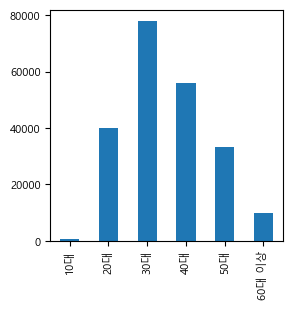

<Axes: >

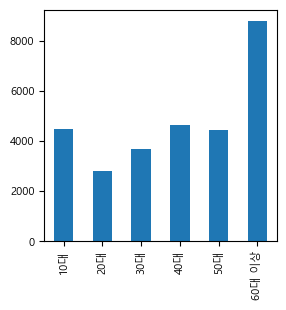

<Axes: >

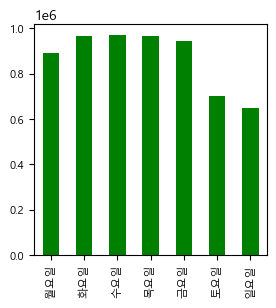

<Axes: >

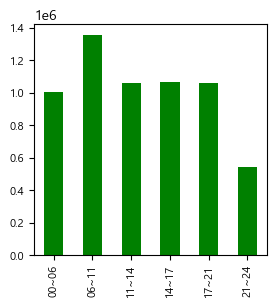

In [33]:
# 여의동 연령 별 직장 인구수
worker3.loc['여의동'].plot.bar(figsize=(3,3), fontsize=8)
plt.show()

# 여의동 연령 별 상주 인구수
home3.loc['여의동'].plot.bar(figsize=(3,3), fontsize=8)
plt.show()

# 여의동 요일 별 유동 인구수
road5.loc['여의동'].plot.bar(figsize=(3,3), fontsize=8, color='g')
plt.show()

# 여의동 시간 별 유동 인구수
road4.loc['여의동'].plot.bar(figsize=(3,3), fontsize=8, color='g')
plt.show()

#### 유동인구 TOP5 (역삼1동, 서교동, 북아현동, 길동, 화곡1동)

<Axes: >

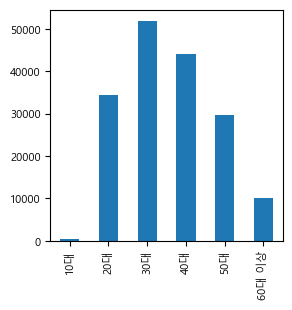

<Axes: >

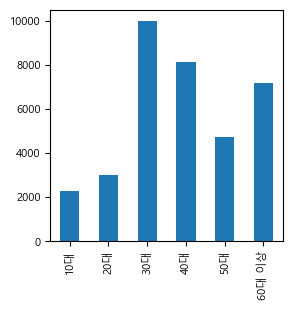

<Axes: >

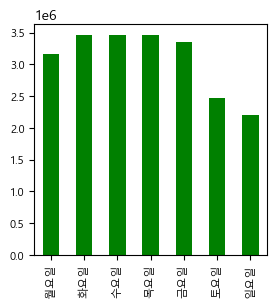

<Axes: >

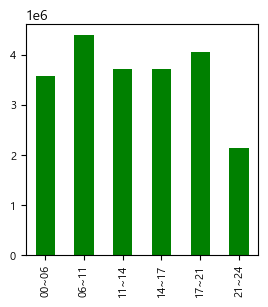

In [34]:
# 역삼1동 연령 별 직장 인구수
worker3.loc['역삼1동'].plot.bar(figsize=(3,3), fontsize=8)
plt.show()

# 역삼1동 연령 별 상주 인구수
home3.loc['역삼1동'].plot.bar(figsize=(3,3), fontsize=8)
plt.show()

# 역삼1동 요일 별 유동 인구수
road5.loc['역삼1동'].plot.bar(figsize=(3,3), fontsize=8, color='g')
plt.show()

# 역삼1동 시간 별 유동 인구수
road4.loc['역삼1동'].plot.bar(figsize=(3,3), fontsize=8, color='g')
plt.show()

<Axes: >

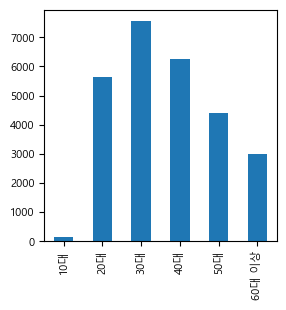

<Axes: >

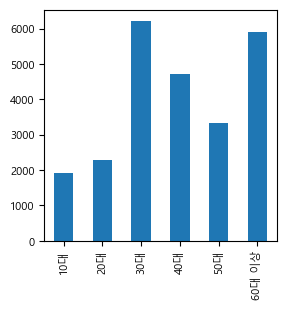

<Axes: >

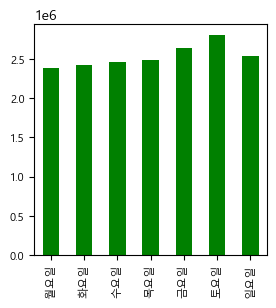

<Axes: >

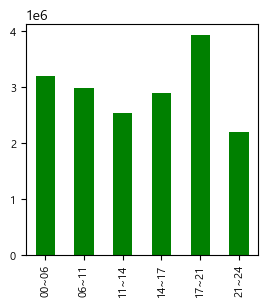

In [35]:
# 서교동 연령 별 직장 인구수
worker3.loc['서교동'].plot.bar(figsize=(3,3), fontsize=8)
plt.show()

# 서교동 연령 별 상주 인구수
home3.loc['서교동'].plot.bar(figsize=(3,3), fontsize=8)
plt.show()

# 서교동 요일 별 유동 인구수
road5.loc['서교동'].plot.bar(figsize=(3,3), fontsize=8, color='g')
plt.show()

# 서교동 시간 별 유동 인구수
road4.loc['서교동'].plot.bar(figsize=(3,3), fontsize=8, color='g')
plt.show()

<Axes: >

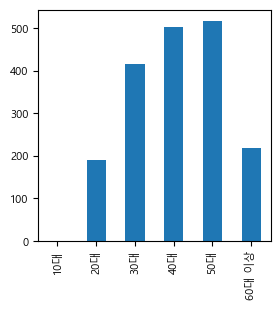

<Axes: >

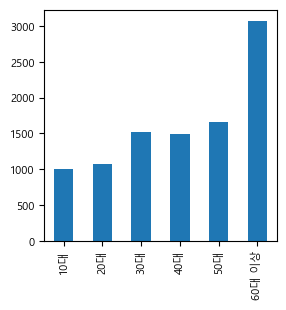

<Axes: >

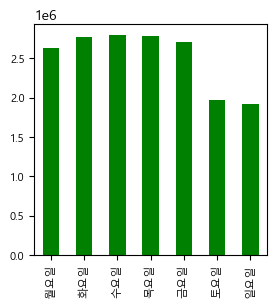

<Axes: >

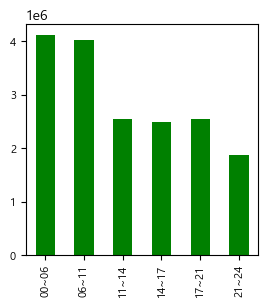

In [36]:
# 북아현동 연령 별 직장 인구수
worker3.loc['북아현동'].plot.bar(figsize=(3,3), fontsize=8)
plt.show()

# 북아현동 연령 별 상주 인구수
home3.loc['북아현동'].plot.bar(figsize=(3,3), fontsize=8)
plt.show()

# 북아현동 요일 별 유동 인구수
road5.loc['북아현동'].plot.bar(figsize=(3,3), fontsize=8, color='g')
plt.show()

# 북아현동 시간 별 유동 인구수
road4.loc['북아현동'].plot.bar(figsize=(3,3), fontsize=8, color='g')
plt.show()

<Axes: >

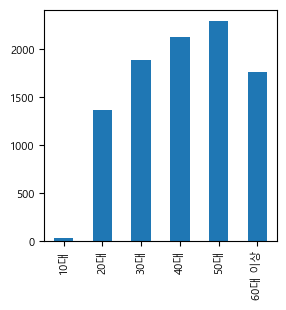

<Axes: >

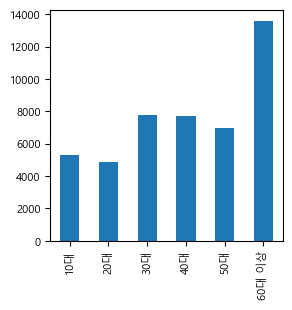

<Axes: >

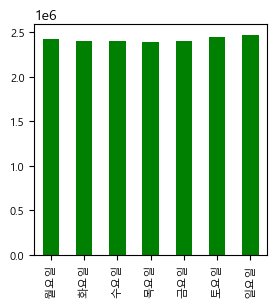

<Axes: >

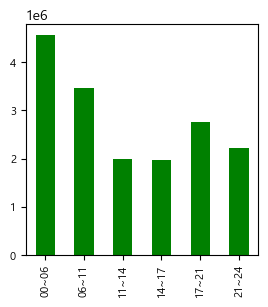

In [37]:
# 길동 연령 별 직장 인구수
worker3.loc['길동'].plot.bar(figsize=(3,3), fontsize=8)
plt.show()

# 길동 연령 별 상주 인구수
home3.loc['길동'].plot.bar(figsize=(3,3), fontsize=8)
plt.show()

# 길동 요일 별 유동 인구수
road5.loc['길동'].plot.bar(figsize=(3,3), fontsize=8, color='g')
plt.show()

# 길동 시간 별 유동 인구수
road4.loc['길동'].plot.bar(figsize=(3,3), fontsize=8, color='g')
plt.show()

<Axes: >

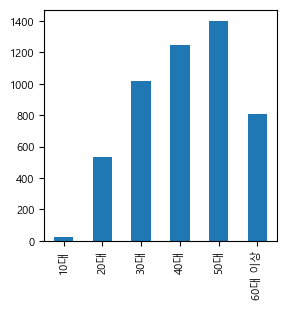

<Axes: >

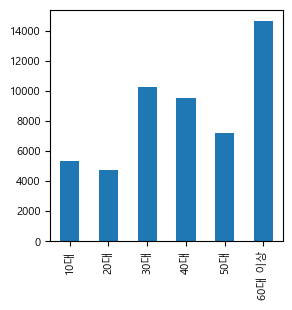

<Axes: >

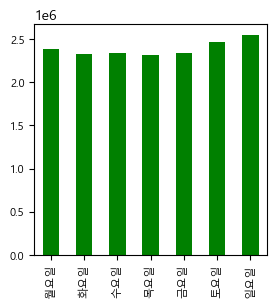

<Axes: >

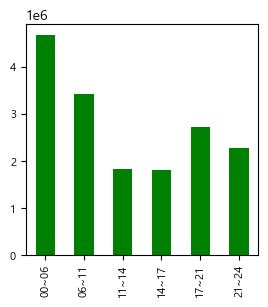

In [38]:
# 화곡1동 연령 별 직장 인구수
worker3.loc['화곡1동'].plot.bar(figsize=(3,3), fontsize=8)
plt.show()

# 화곡1동 연령 별 상주 인구수
home3.loc['화곡1동'].plot.bar(figsize=(3,3), fontsize=8)
plt.show()

# 화곡1동 요일 별 유동 인구수
road5.loc['화곡1동'].plot.bar(figsize=(3,3), fontsize=8, color='g')
plt.show()

# 화곡1동 시간 별 유동 인구수
road4.loc['화곡1동'].plot.bar(figsize=(3,3), fontsize=8, color='g')
plt.show()

### 인구 데이터 별 TOP5 행정동 매출 금액, 점포 수 추출

In [39]:
# 서비스 업종 중 요식업 관련 업종만 추출
money1 = money[money['서비스_업종_코드_명'].isin(['중식음식점', '패스트푸드점','호프-간이주점','분식전문점', '일식음식점',
                                          '치킨전문점','양식음식점', '한식음식점'])]

# # 분기별로 나뉘어진 매출을 1년치로 합산
group_money = money1.groupby(['행정동_코드_명','서비스_업종_코드_명']).sum()

# 시간별, 연령별, 요일별로 구분하여 추출
moneytime = group_money[['시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액',
       '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액']]
moneyday = group_money[['월요일_매출_금액','화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액',
       '일요일_매출_금액']]
moneyage = group_money[['연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액',
       '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액']]

In [40]:
# 보기 좋게 컬럼이름변경
moneytime.rename(columns={'시간대_00~06_매출_금액':'00~06',
       '시간대_06~11_매출_금액':'06~11', '시간대_11~14_매출_금액':'11~14', '시간대_14~17_매출_금액':'14~17',
       '시간대_17~21_매출_금액':'17~21', '시간대_21~24_매출_금액':'21~24'}, inplace=True)

# 보기 좋게 컬럼이름변경
moneyday.rename(columns={'월요일_매출_금액':'월요일', 
                      '화요일_매출_금액':'화요일', '수요일_매출_금액':'수요일', '목요일_매출_금액':'목요일', 
                      '금요일_매출_금액':'금요일', '토요일_매출_금액':'토요일', '일요일_매출_금액':'일요일'}, inplace=True)

# 보기 좋게 컬럼이름변경
moneyage.rename(columns={'연령대_10_매출_금액': '10대', '연령대_20_매출_금액':'20대',	
'연령대_30_매출_금액':'30대', '연령대_40_매출_금액':'40대', '연령대_50_매출_금액':'50대','연령대_60_이상_매출_금액':'60대 이상'}, inplace=True)

In [41]:
# x,y 축을 바꿔 시간대 별 업종 매출 보기
moneytime1 = moneytime.transpose()
moneyage1 = moneyage.transpose()
moneyday1 = moneyday.transpose()

In [42]:
# 서비스 업종 중 요식업 관련 업종만 추출
shop2 = shop1[shop1['서비스_업종_코드_명'].isin(['중식음식점', '패스트푸드점','호프-간이주점','분식전문점', '일식음식점',
                                          '치킨전문점','양식음식점', '한식음식점'])]

# 점포 데이터를 행정동 별 업종으로 인덱스 변경
shop2.set_index(['행정동_코드_명','서비스_업종_코드_명'], inplace=True)

# 종로 명 변경
shop2.rename(index={'종로1?2?3?4가동':'종로1·2·3·4가동'}, inplace=True)

# 필요한 점포 수 데이터만 추출
shop3 = shop2['점포_수']


In [43]:
# 시간별, 요일별, 연령별 매출 추출하는 함수
def get_data(dong):
    shop3.loc[dong].plot.bar(figsize=(9,9),fontsize=15)
    moneytime1[dong].plot.line(figsize=(9,9),fontsize=15)
    moneyage1[dong].plot.line(figsize=(9,9),fontsize=15)
    moneyday1[dong].plot.line(figsize=(9,9),fontsize=15)

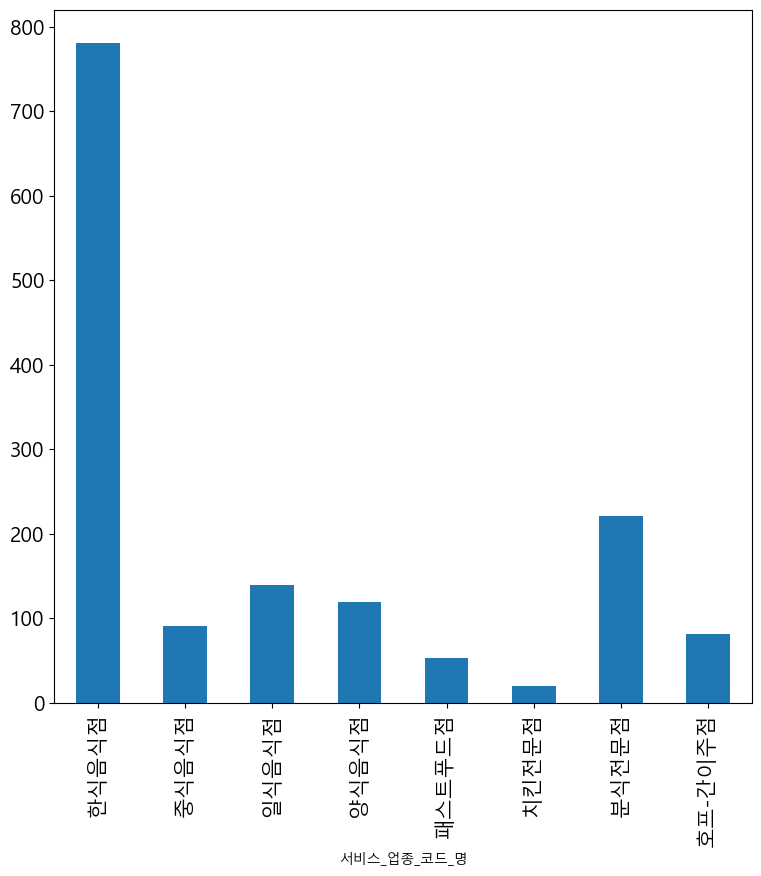

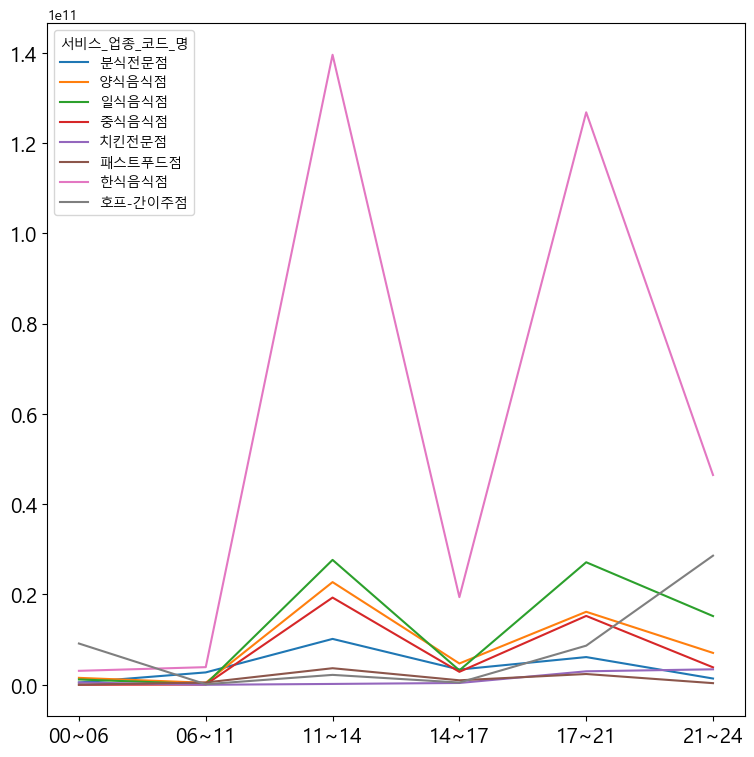

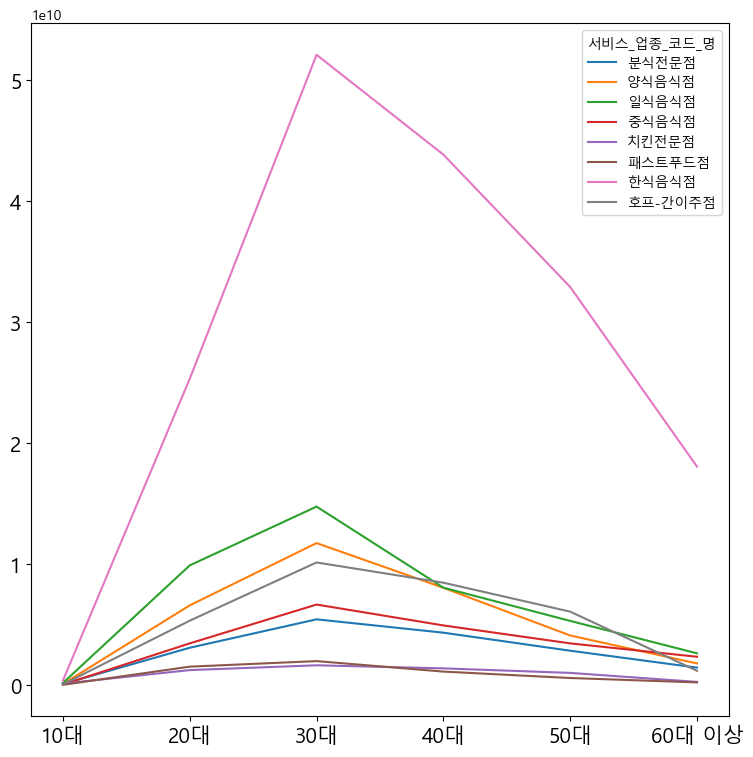

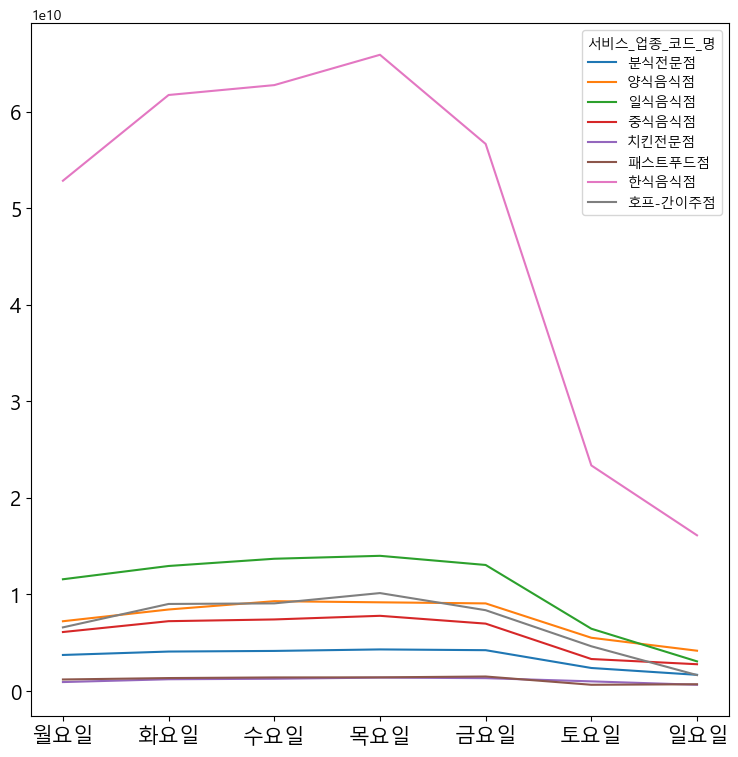

In [44]:
# 여의동의 시간별, 요일별, 연령별 매출, 업종 별 점포 수 추출
get_data('여의동')

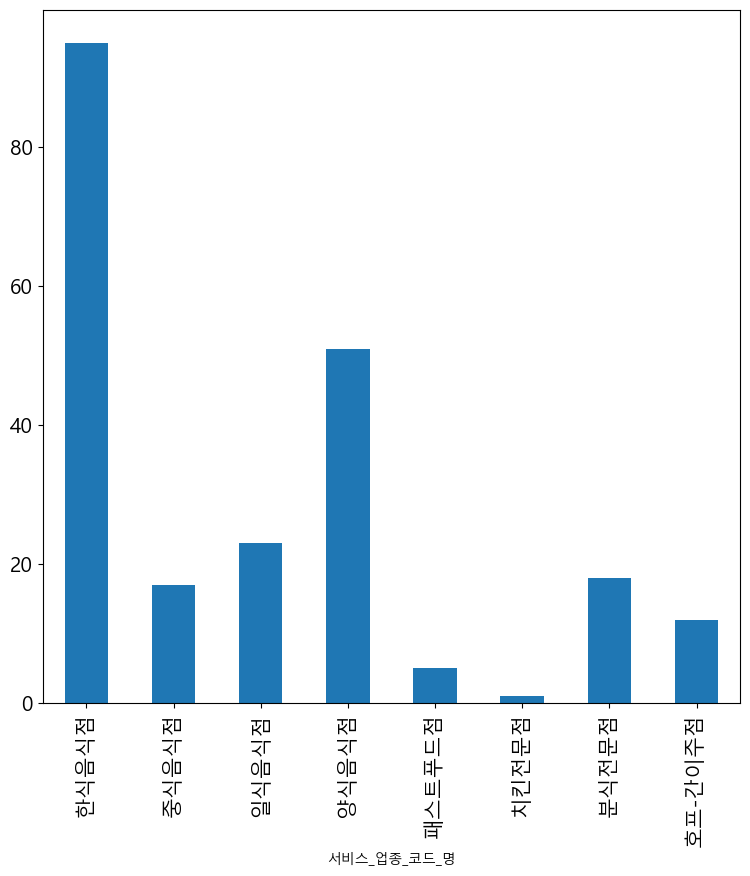

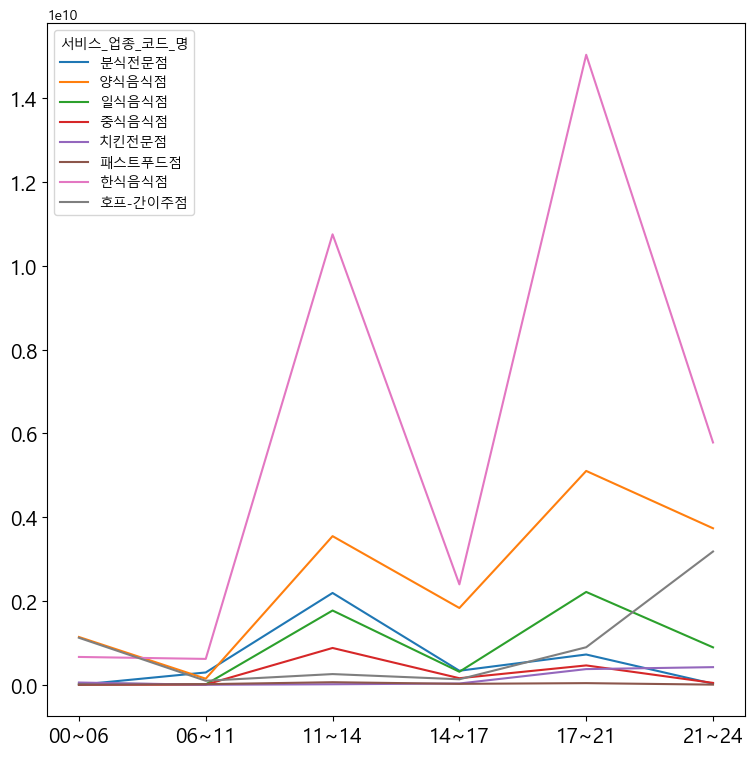

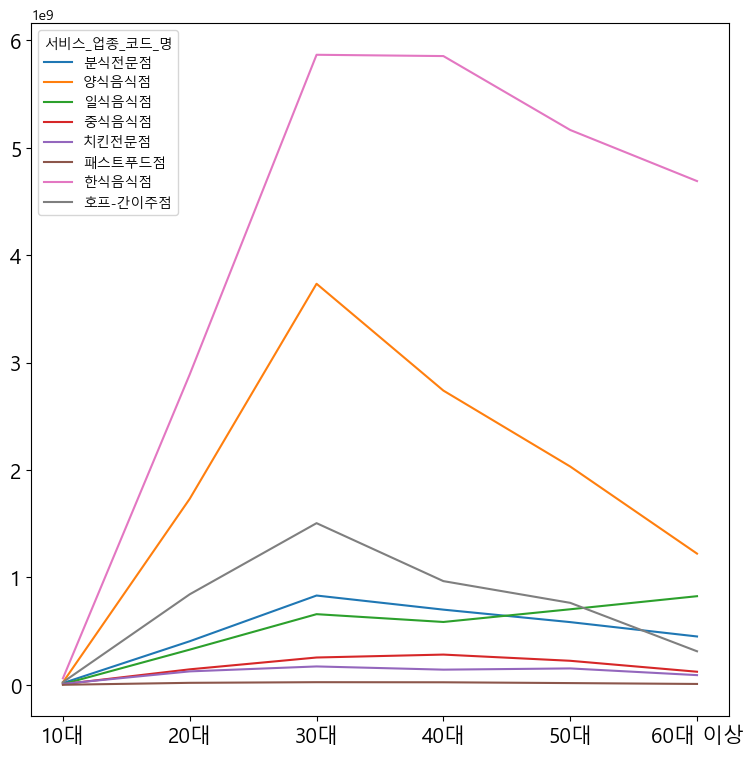

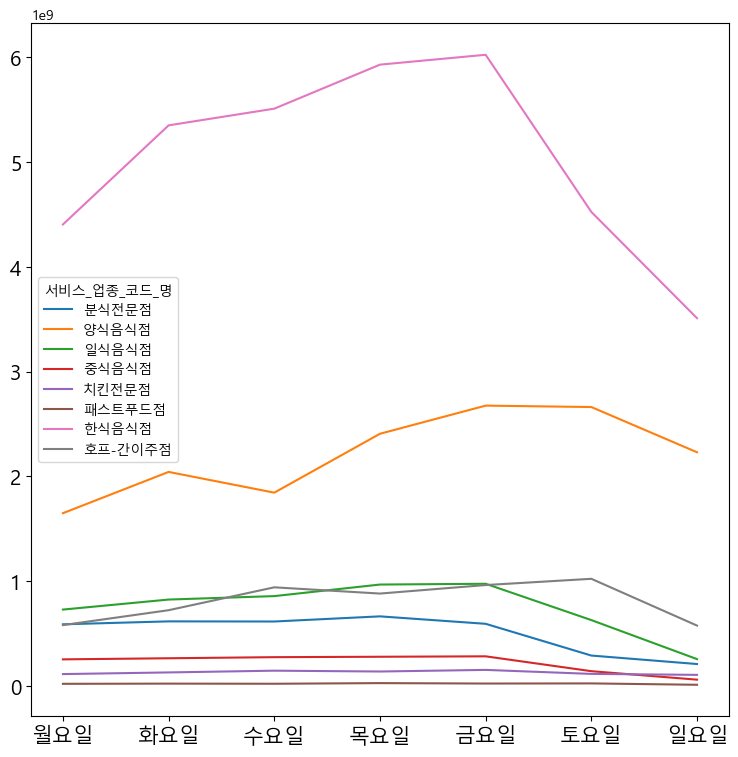

In [45]:
# 도곡2동의 시간별, 요일별, 연령별 매출, 업종 별 점포 수 추출
get_data('도곡2동')

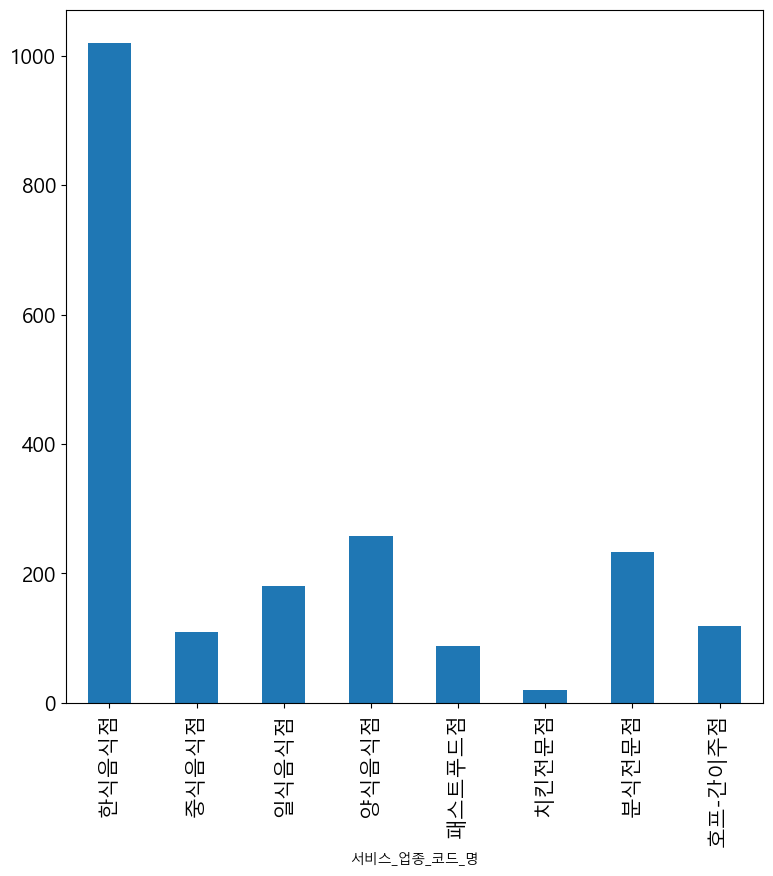

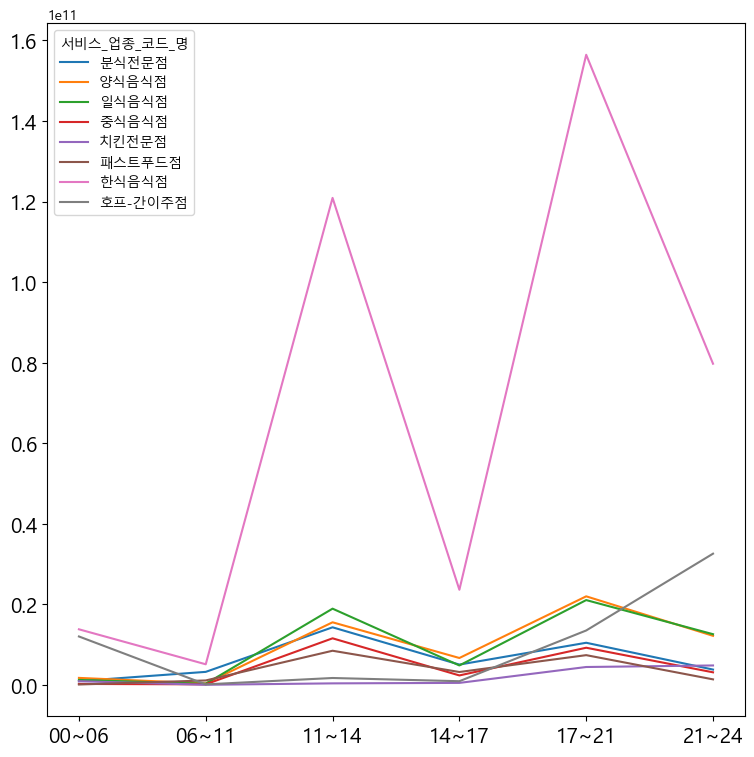

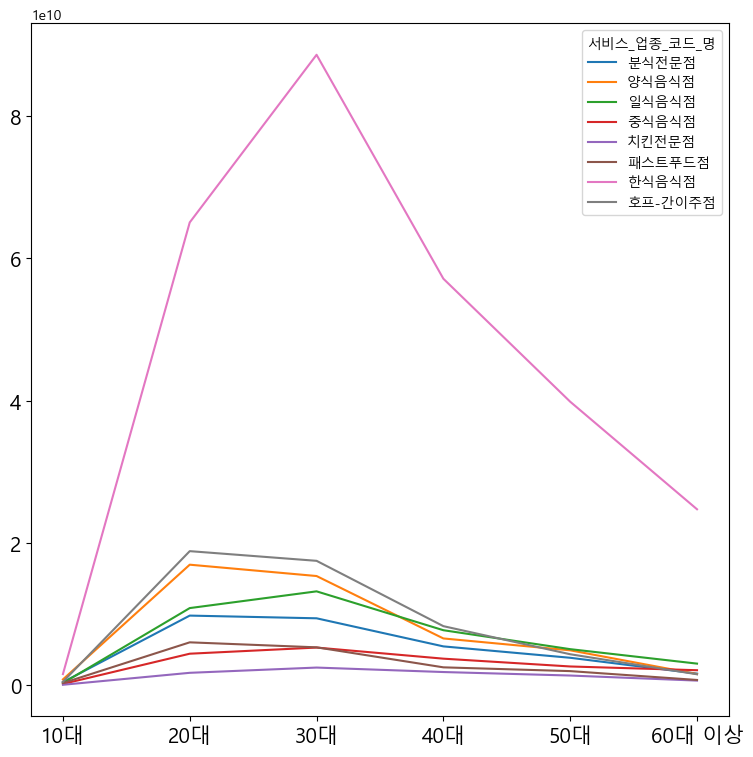

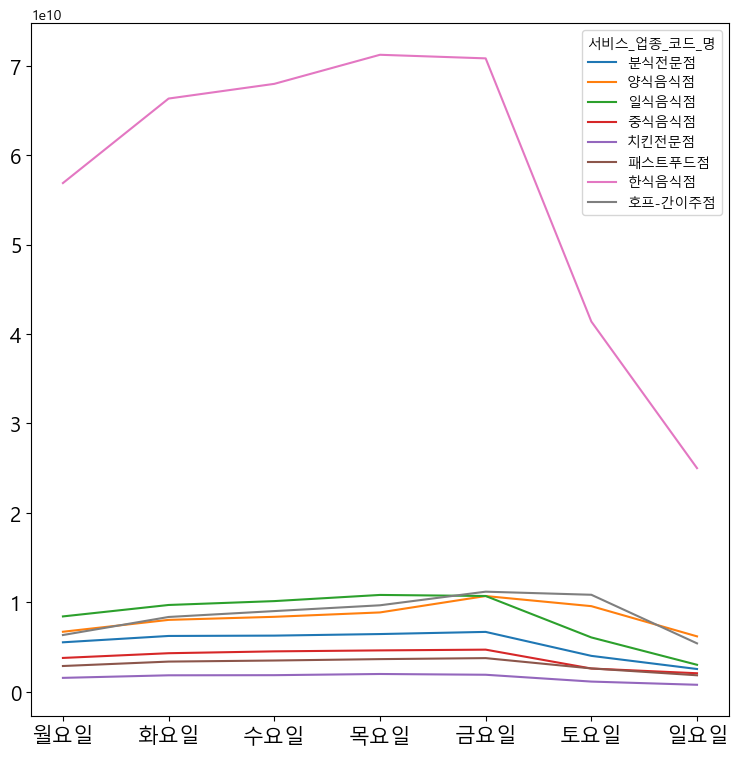

In [46]:
# 역삼1동의 시간별, 요일별, 연령별 매출, 업종 별 점포 수 추출
get_data('역삼1동')

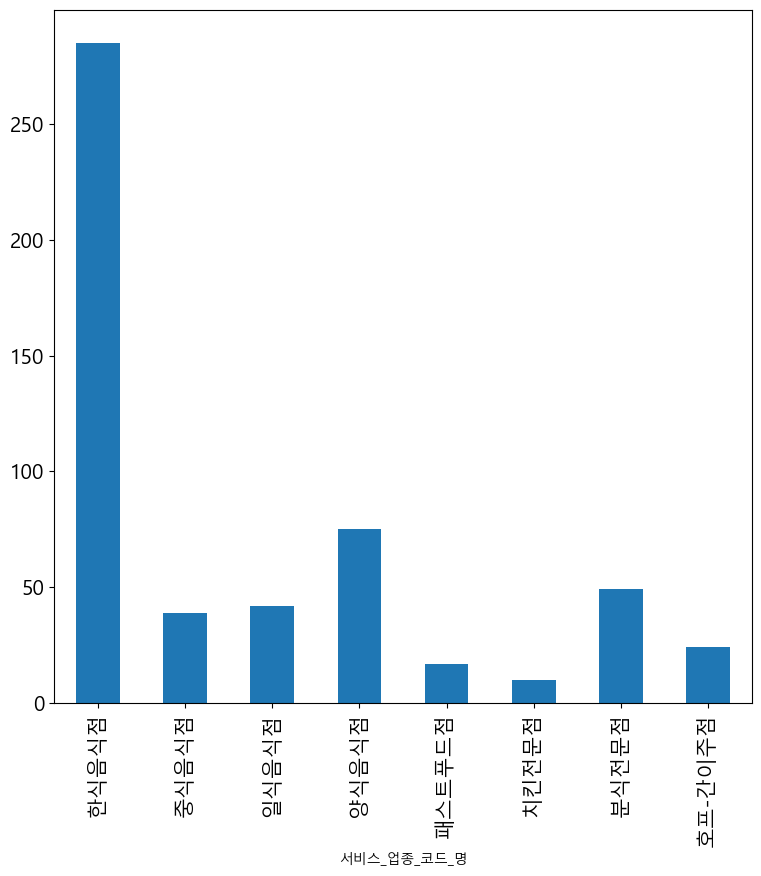

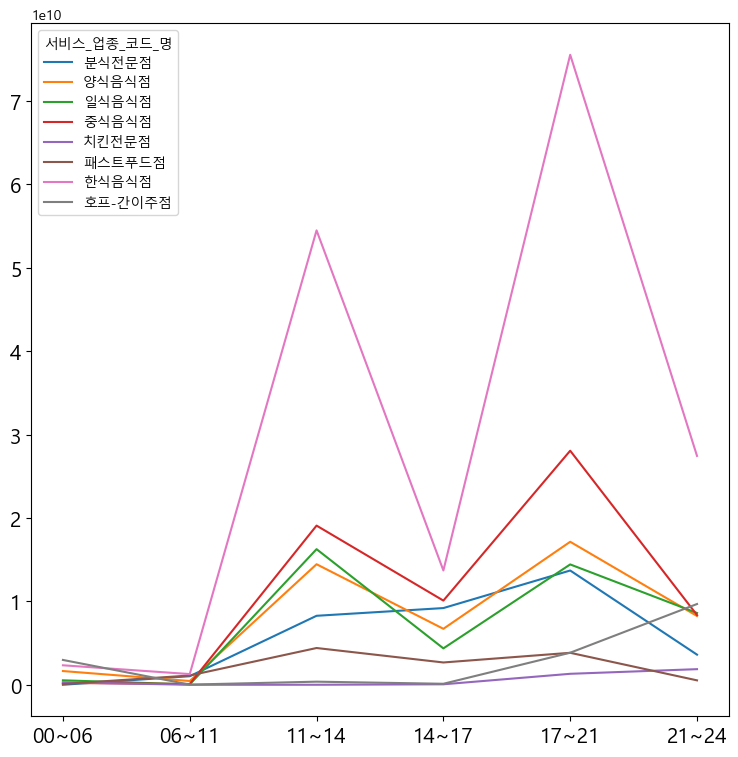

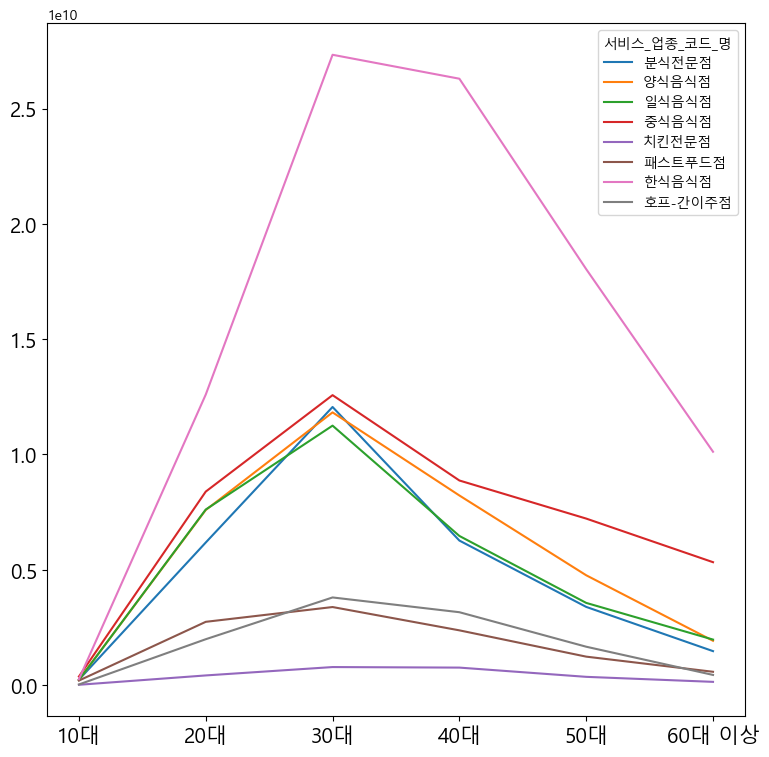

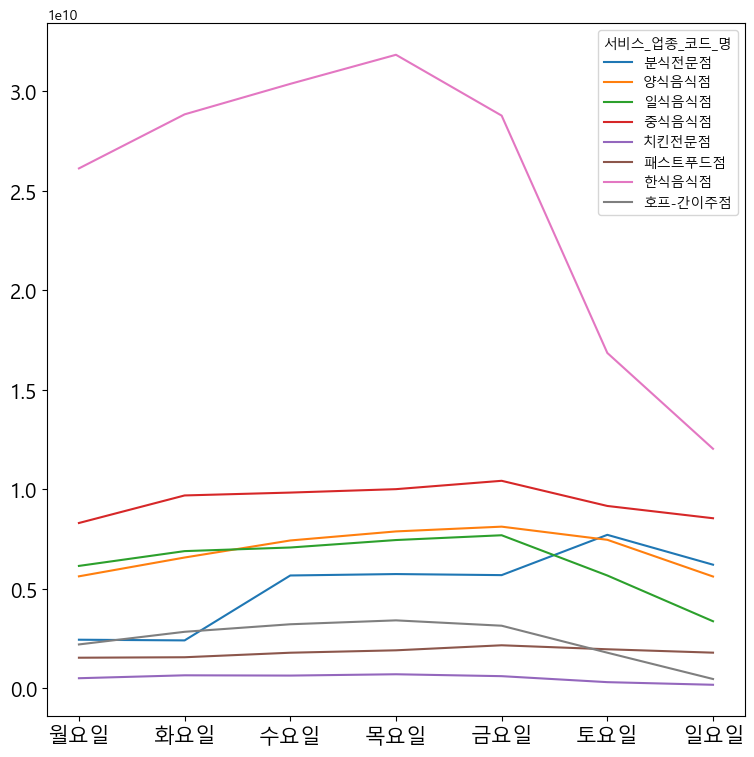

In [47]:
# 삼성1동의 시간별, 요일별, 연령별 매출, 업종 별 점포 수 추출
get_data('삼성1동')

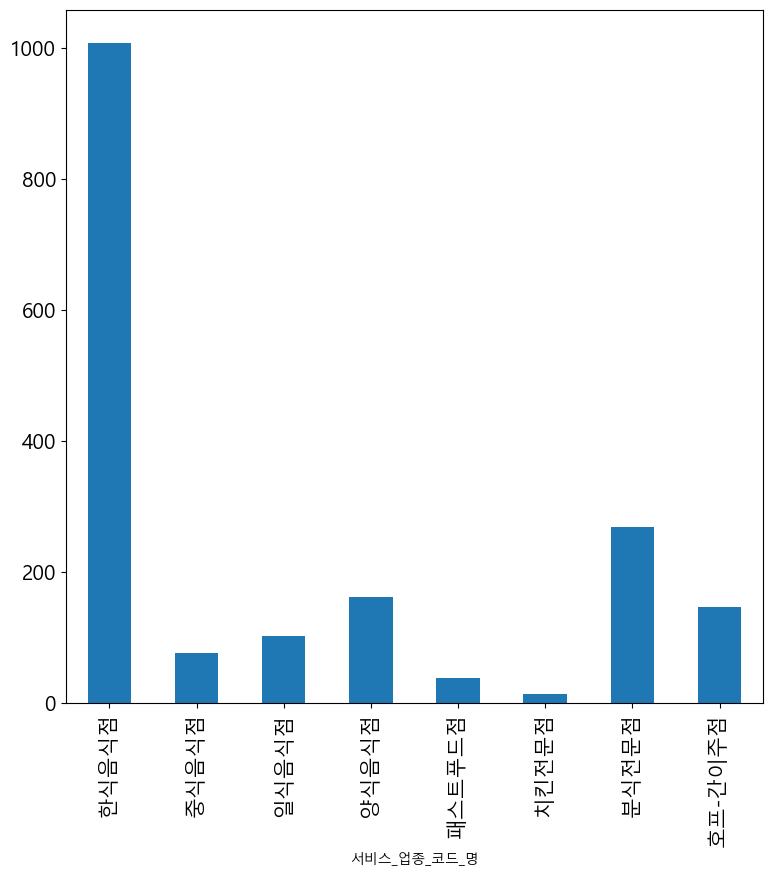

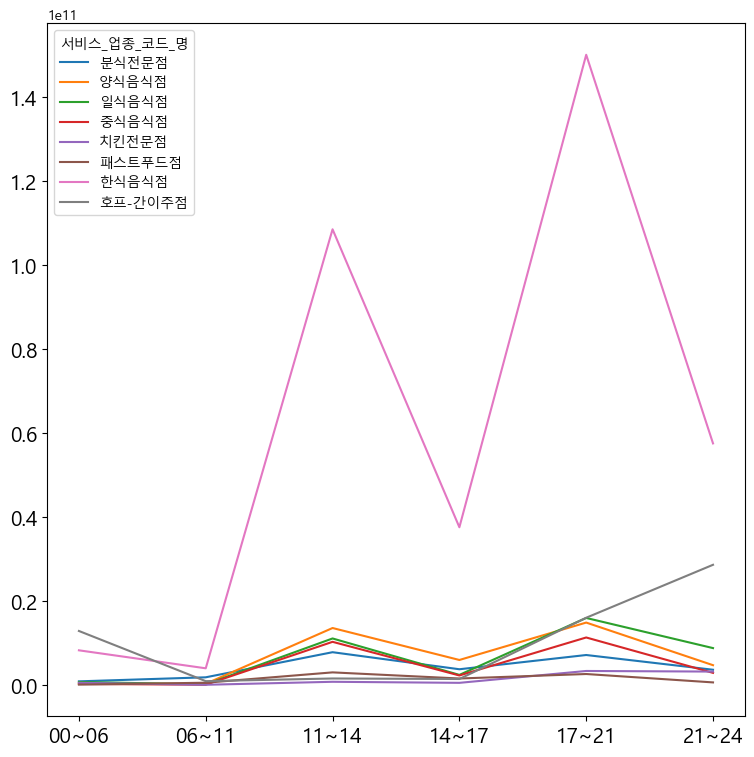

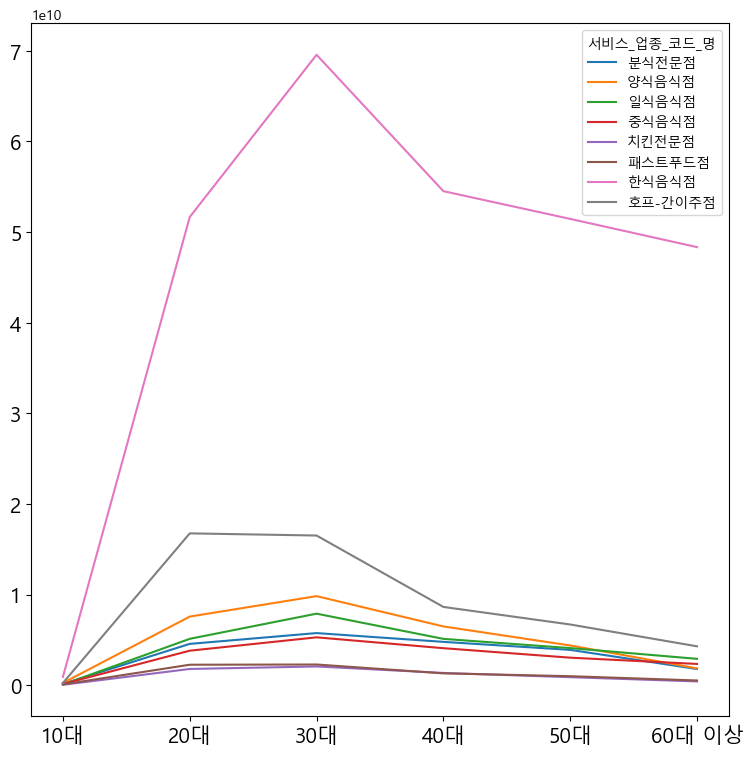

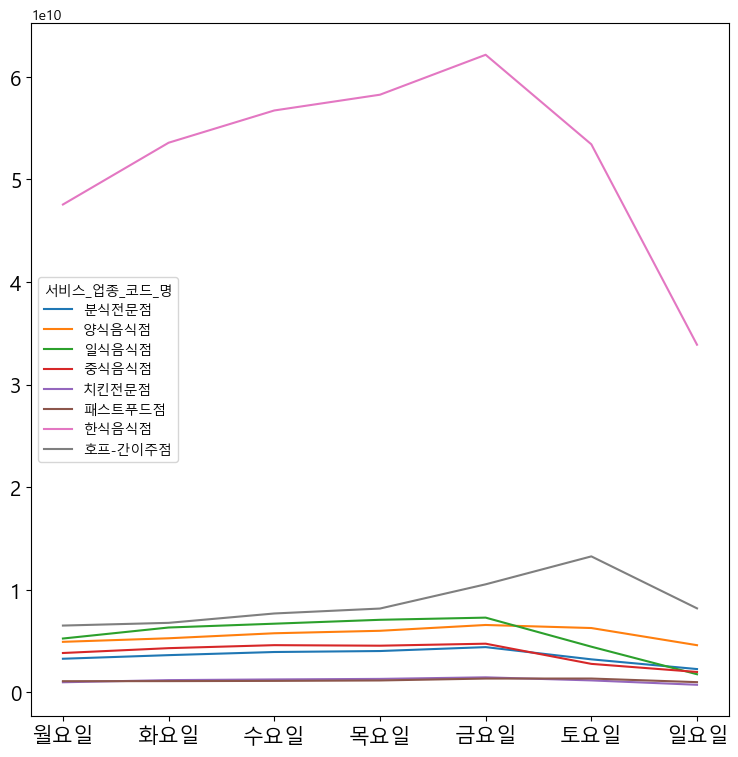

In [48]:
# 종로1234가동의 시간별, 요일별, 연령별 매출, 업종 별 점포 수 추출
get_data('종로1·2·3·4가동')

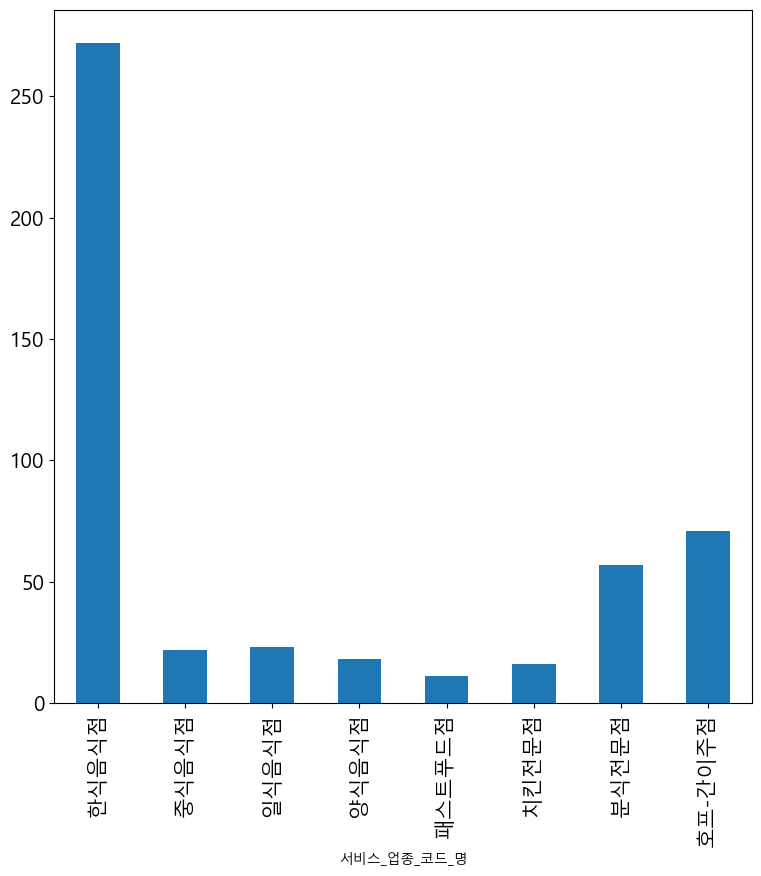

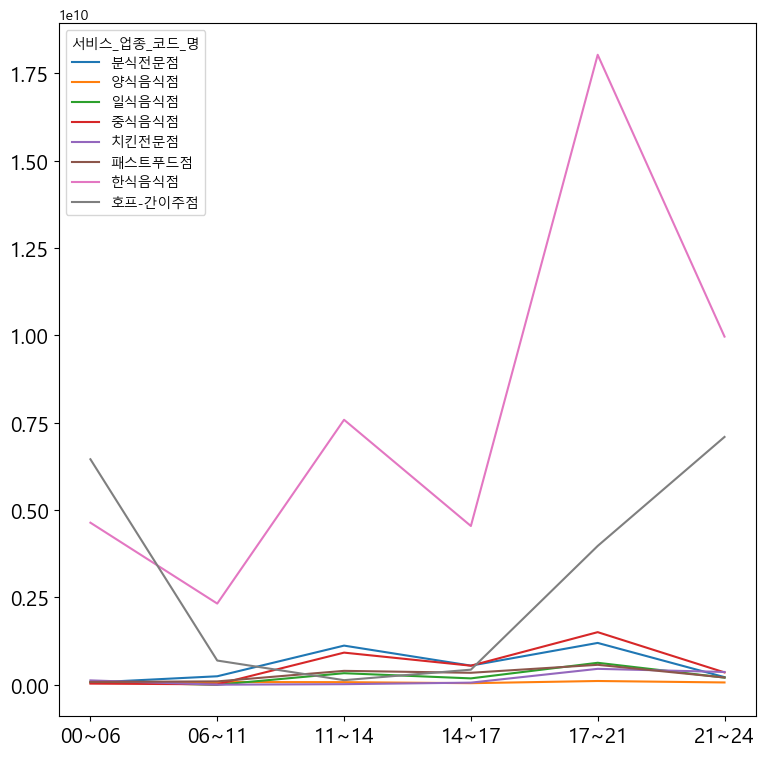

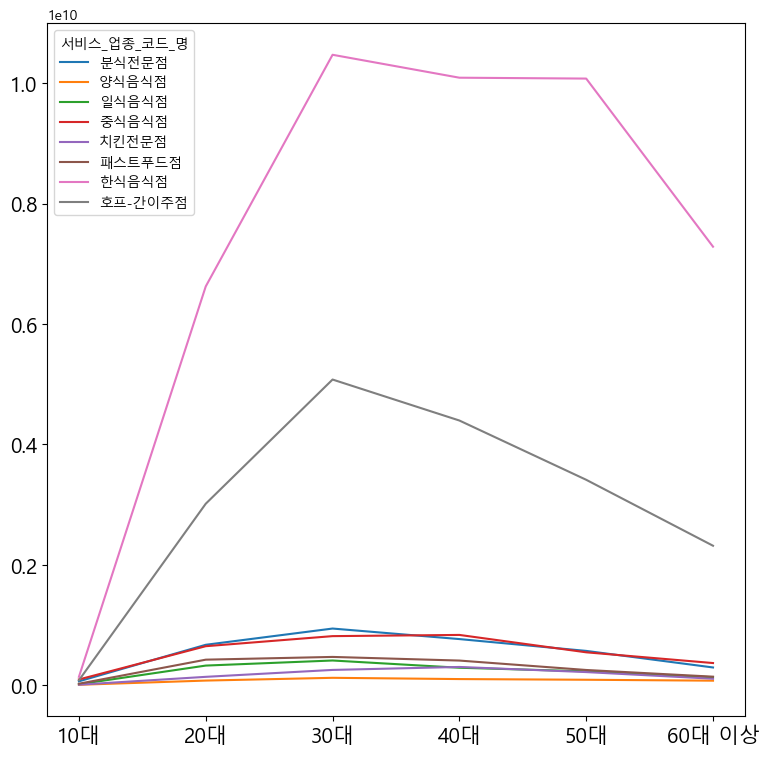

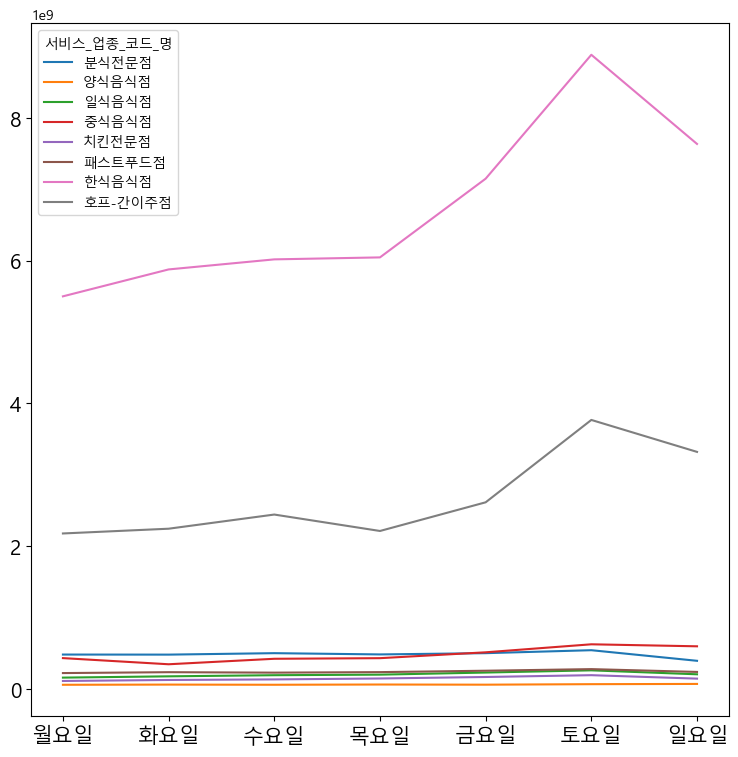

In [49]:
# 화곡1동의 시간별, 요일별, 연령별 매출, 업종 별 점포 수 추출
get_data('화곡1동')

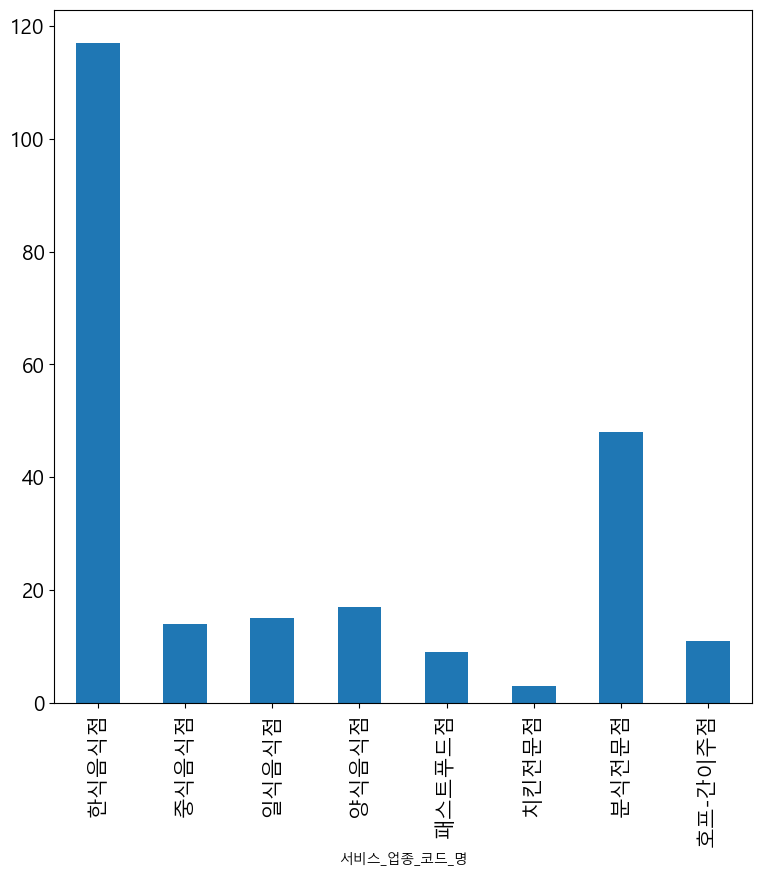

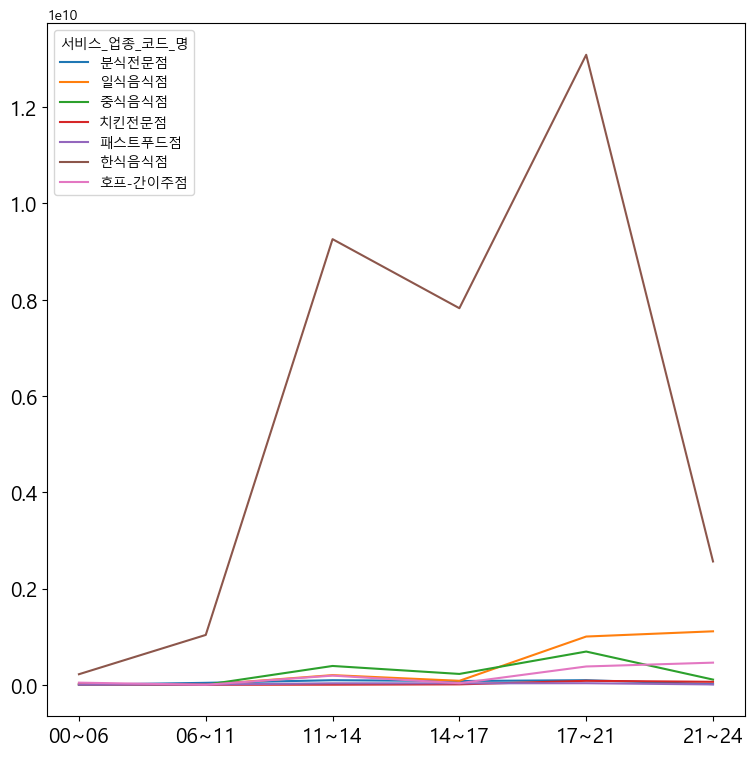

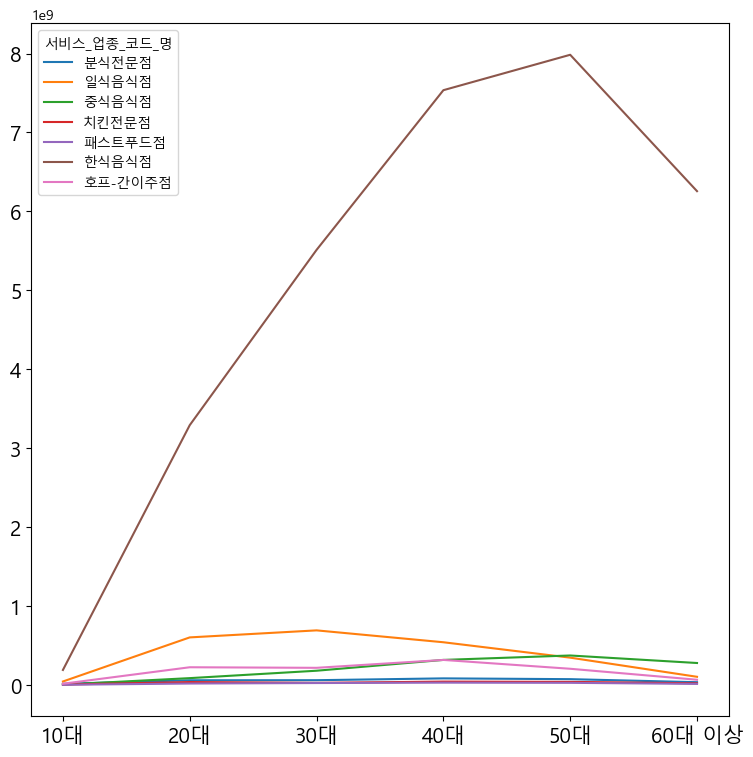

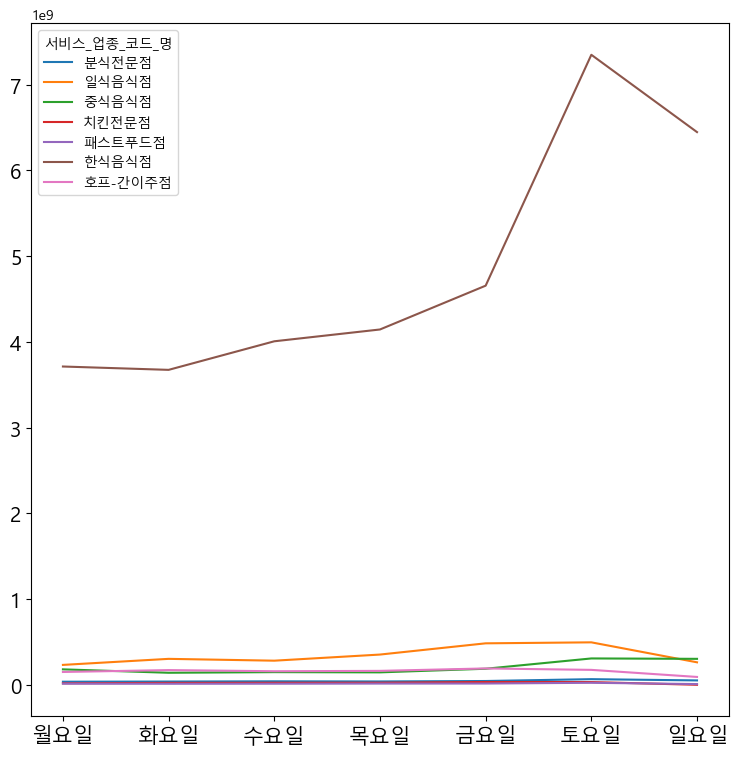

In [50]:
# 진관동의 시간별, 요일별, 연령별 매출, 업종 별 점포 수 추출
get_data('진관동')

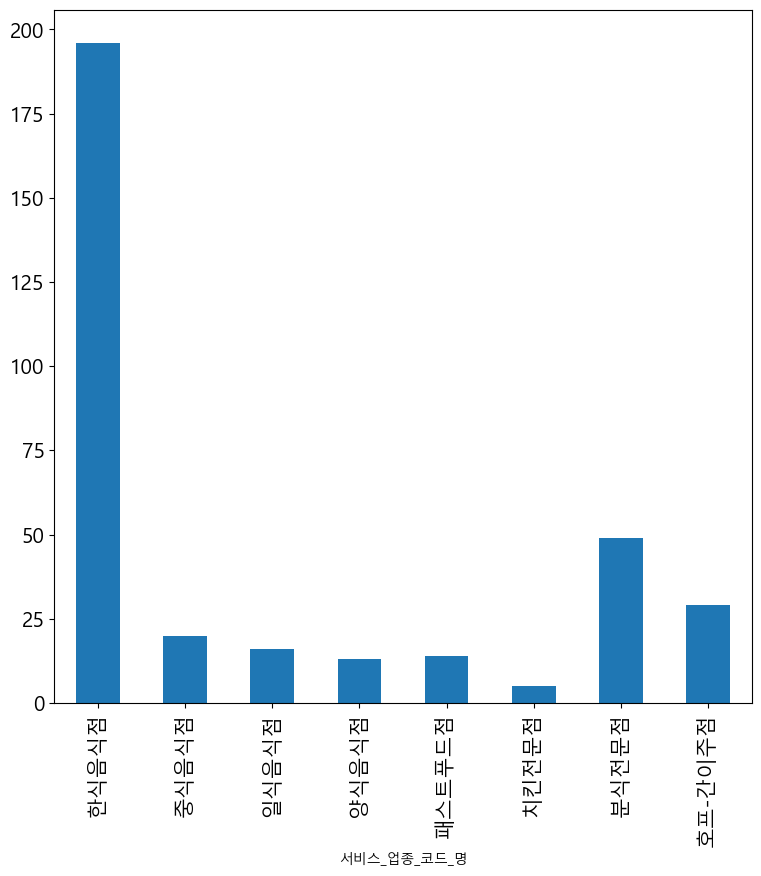

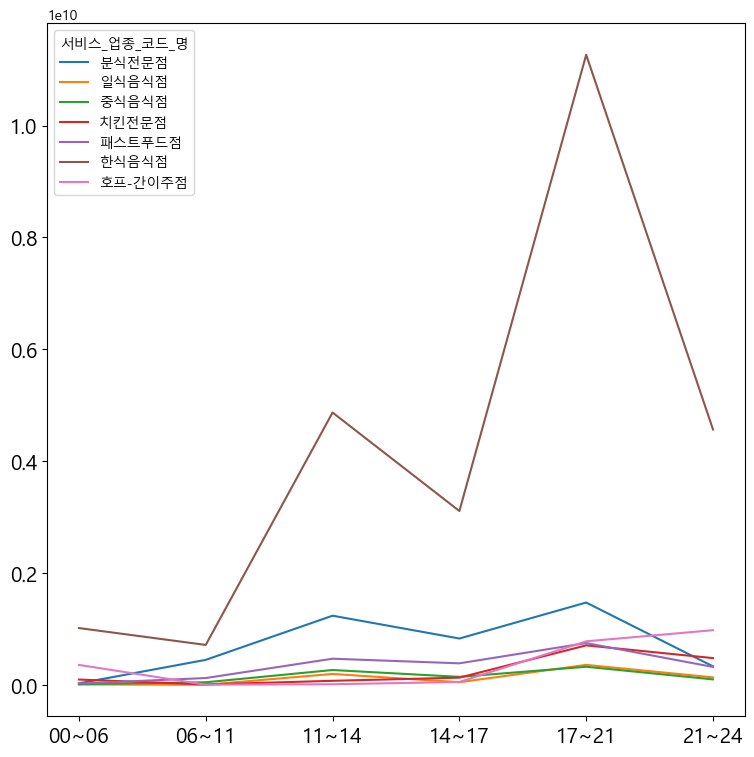

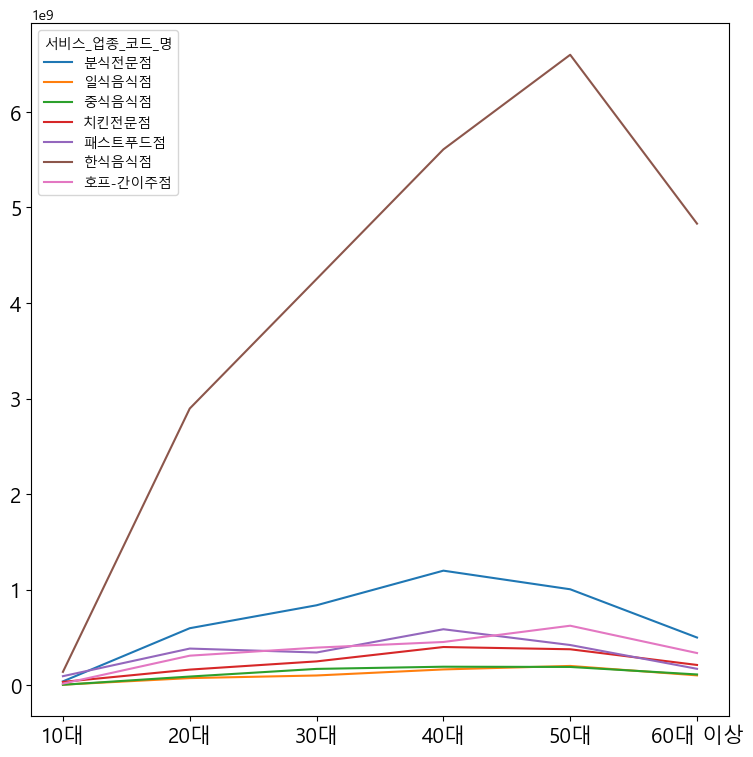

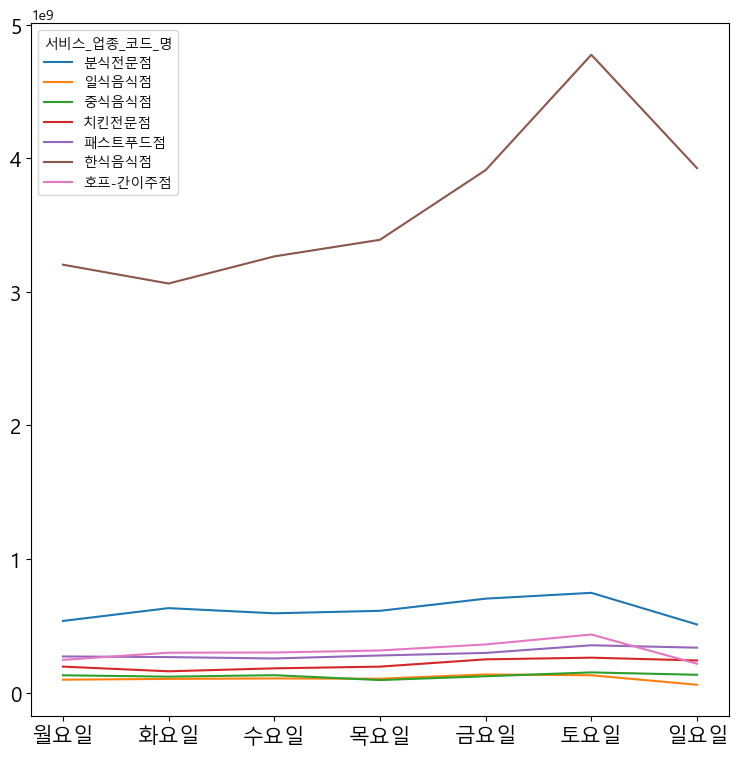

In [51]:
# 역촌동의 시간별, 요일별, 연령별 매출, 업종 별 점포 수 추출
get_data('역촌동')

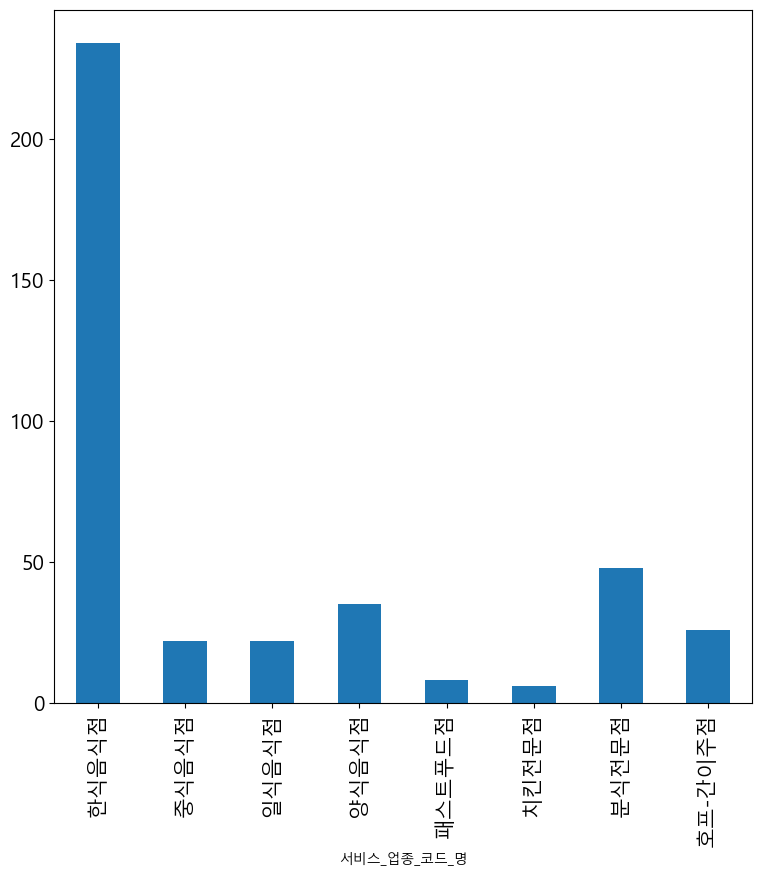

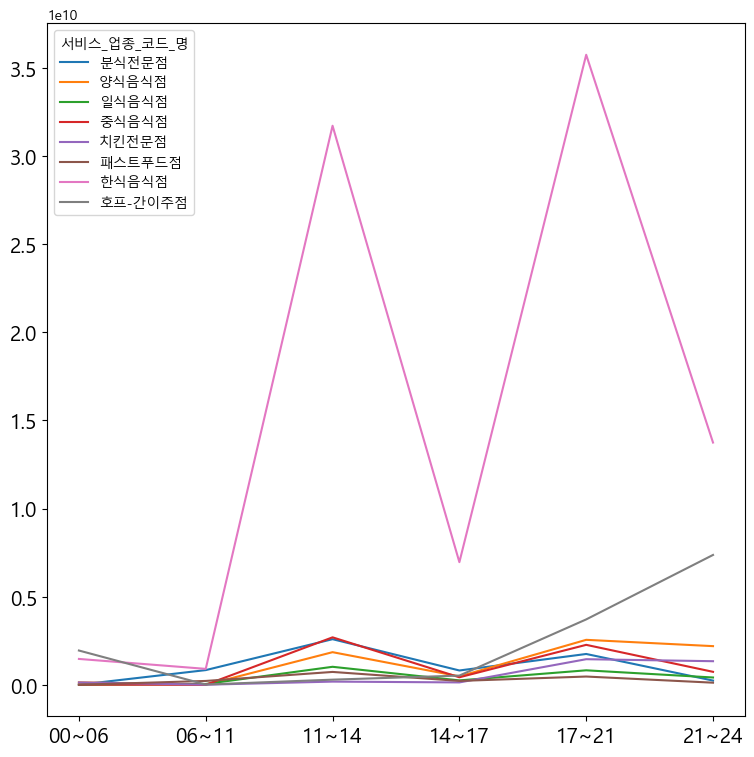

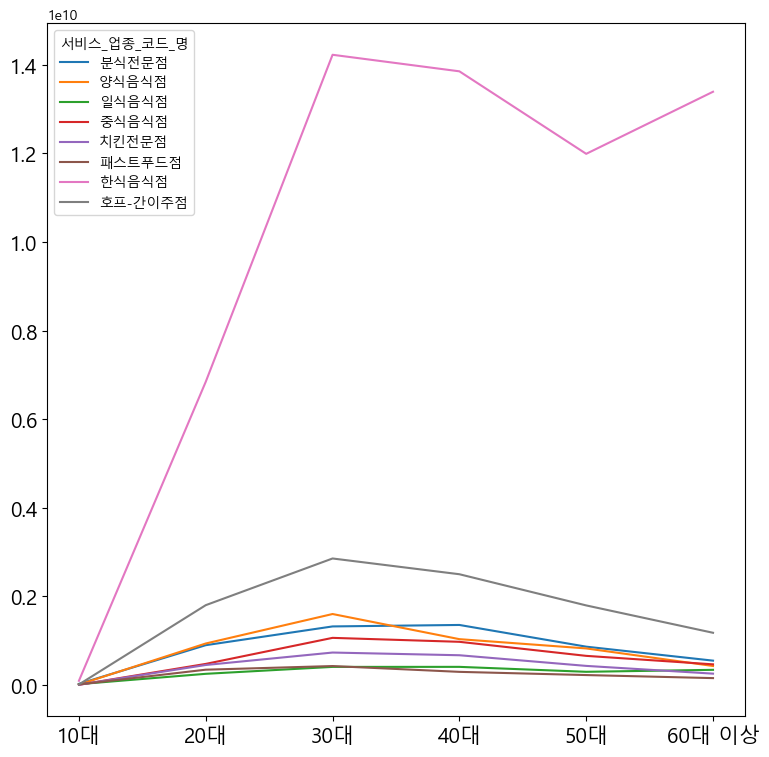

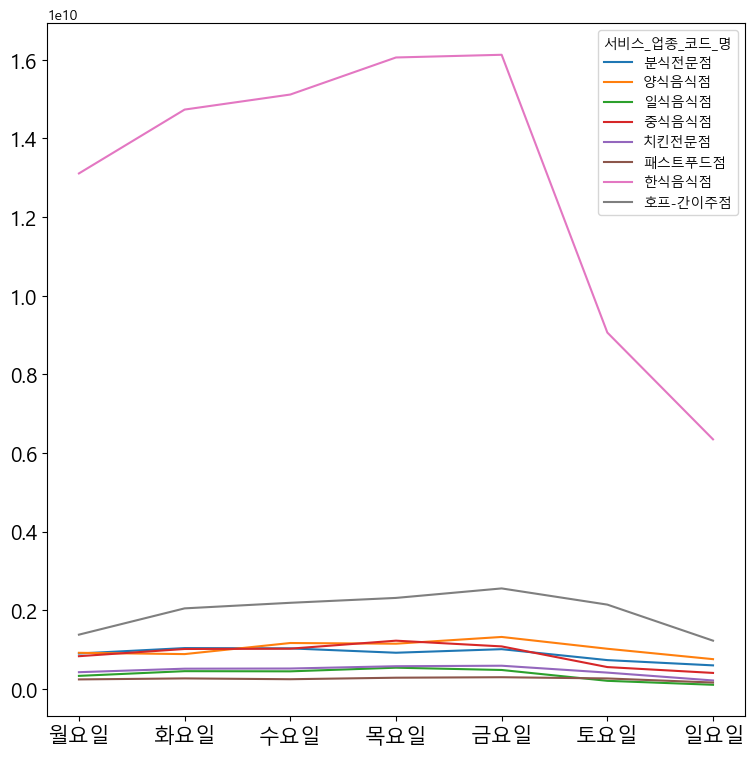

In [52]:
# 양재1동의 시간별, 요일별, 연령별 매출, 업종 별 점포 수 추출
get_data('양재1동')

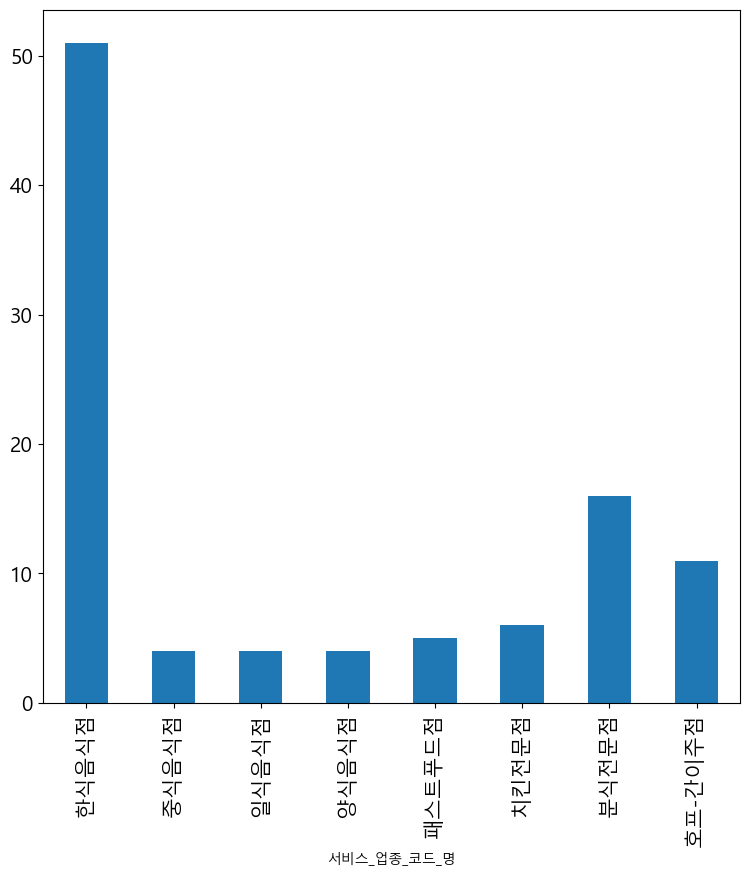

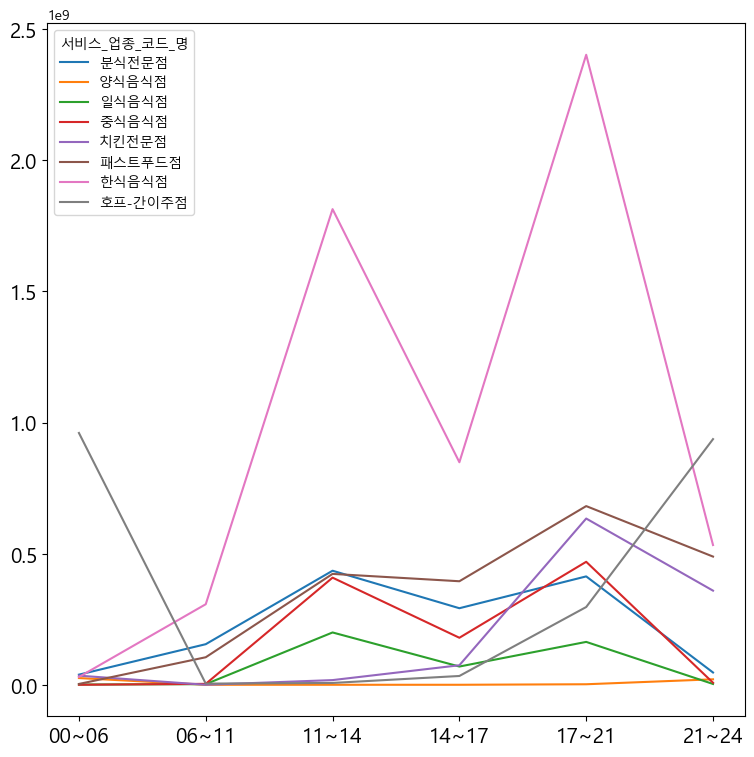

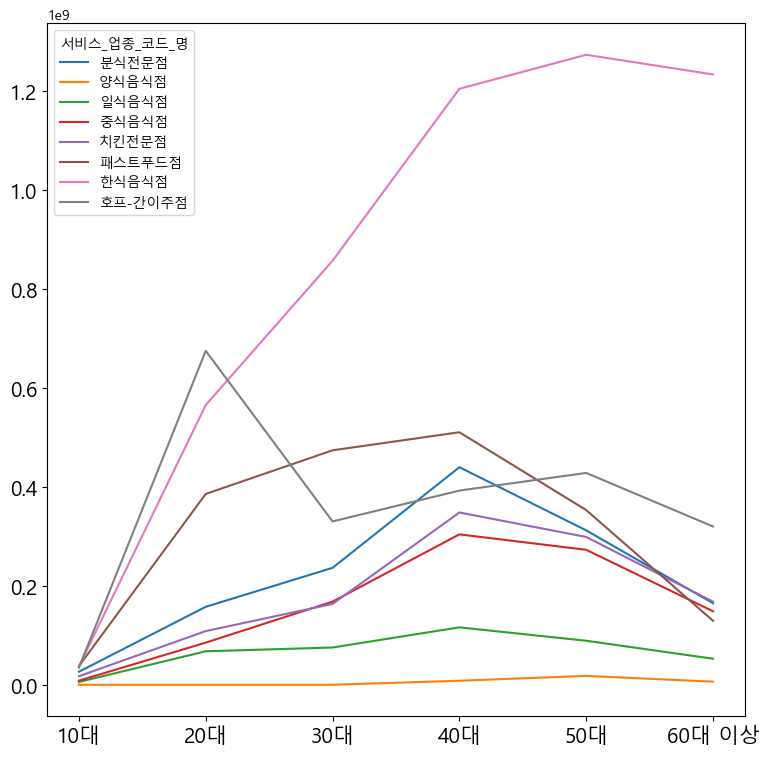

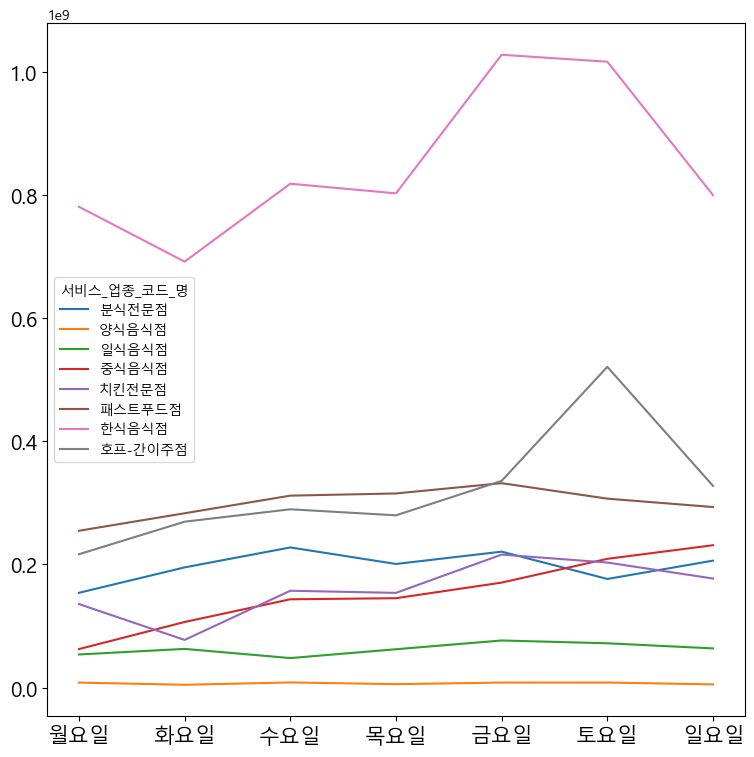

In [53]:
# 신정3동의 시간별, 요일별, 연령별 매출, 업종 별 점포 수 추출
get_data('신정3동')

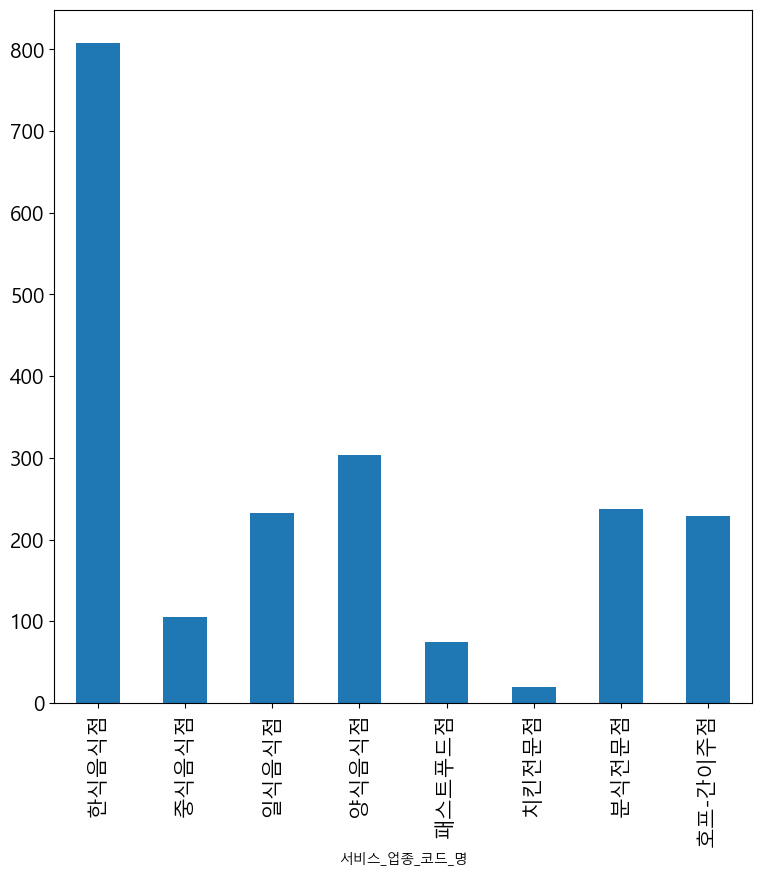

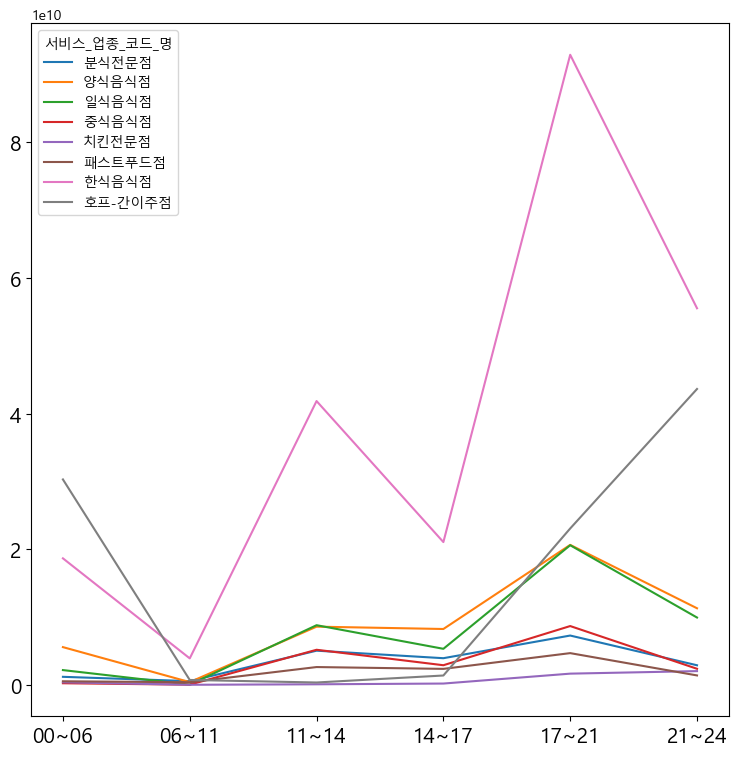

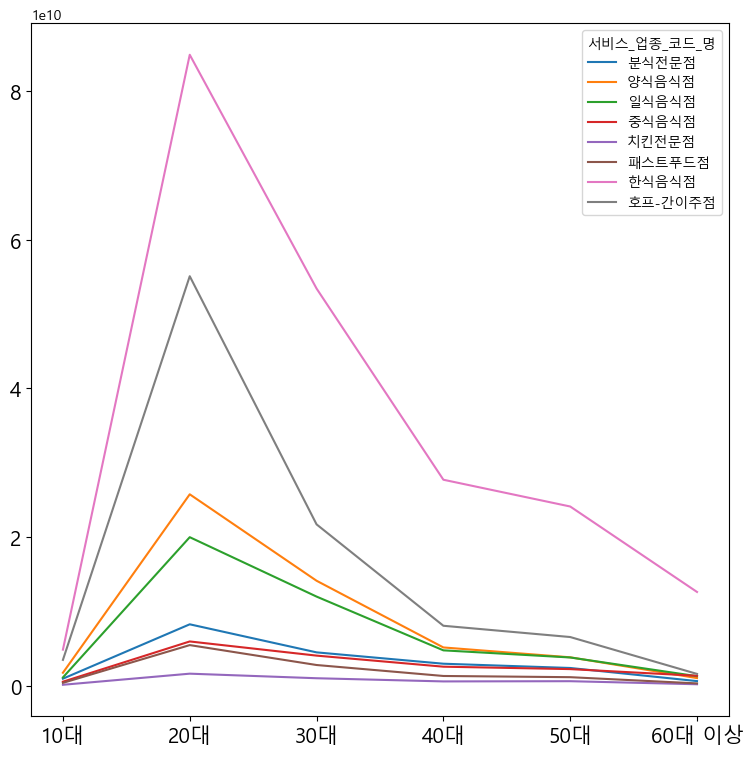

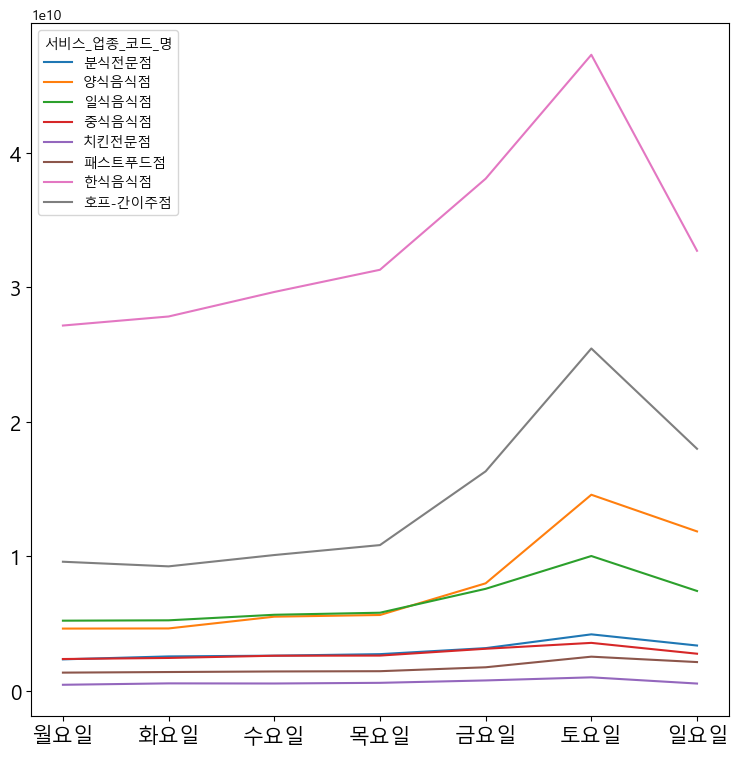

In [54]:
# 서교동의 시간별, 요일별, 연령별 매출, 업종 별 점포 수 추출
get_data('서교동')

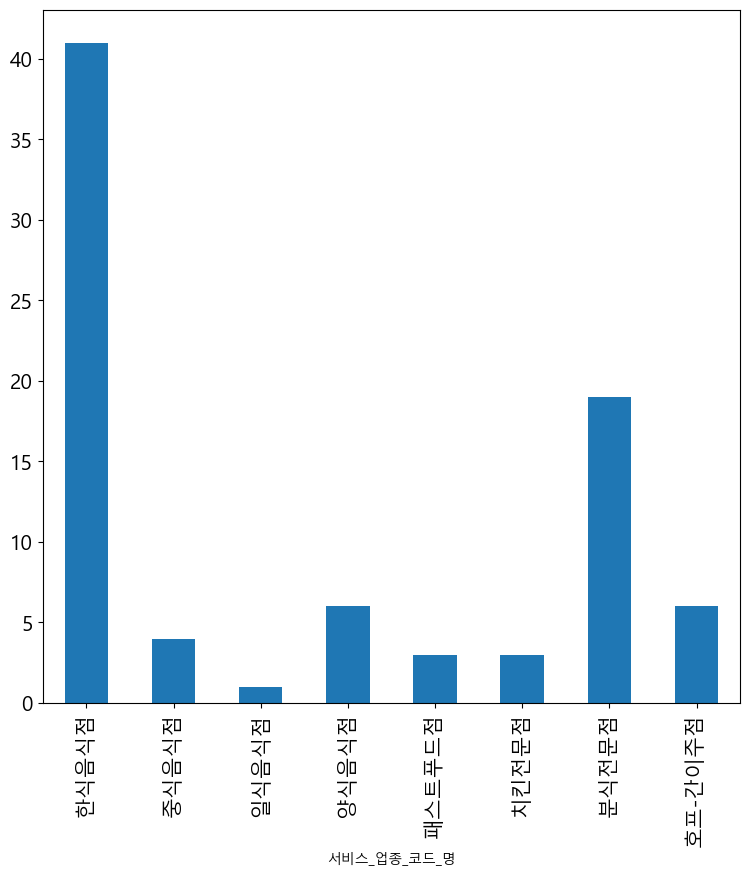

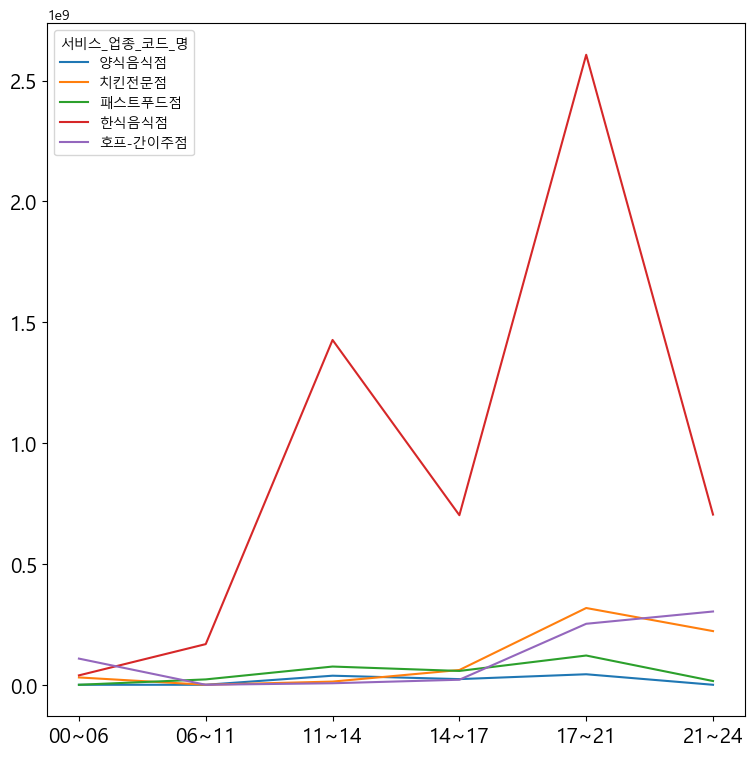

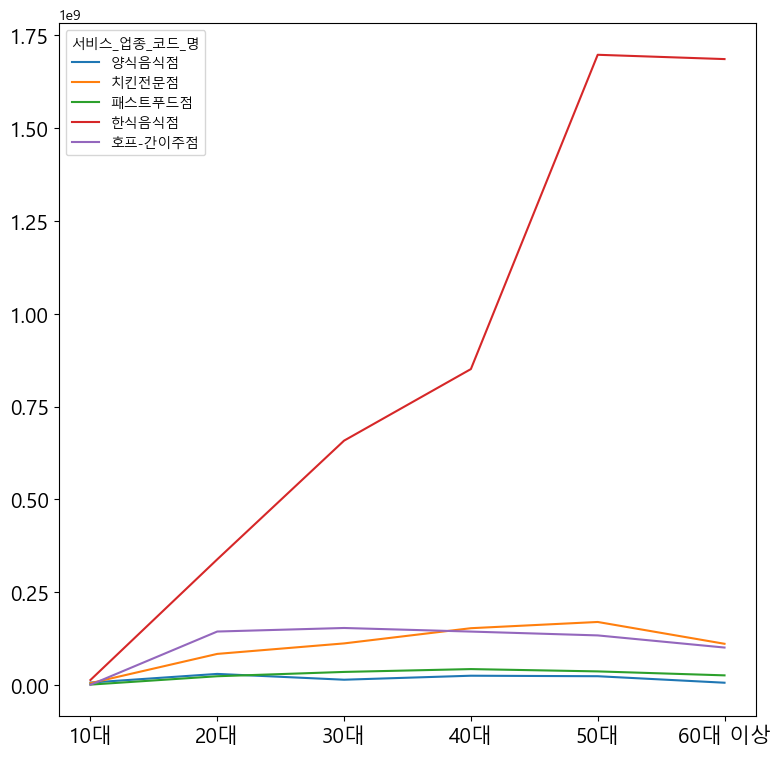

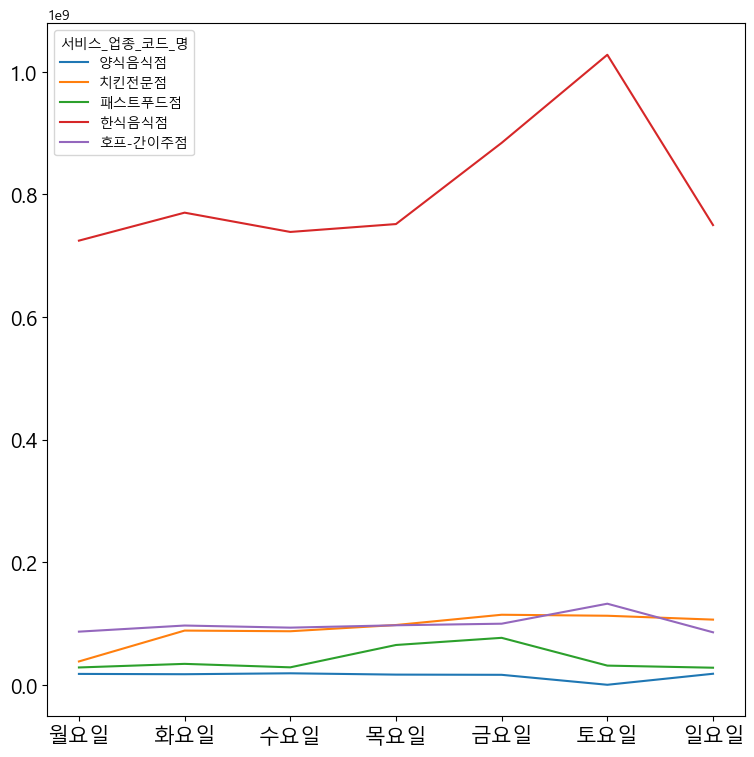

In [55]:
# 북아현동의 시간별, 요일별, 연령별 매출, 업종 별 점포 수 추출
get_data('북아현동')

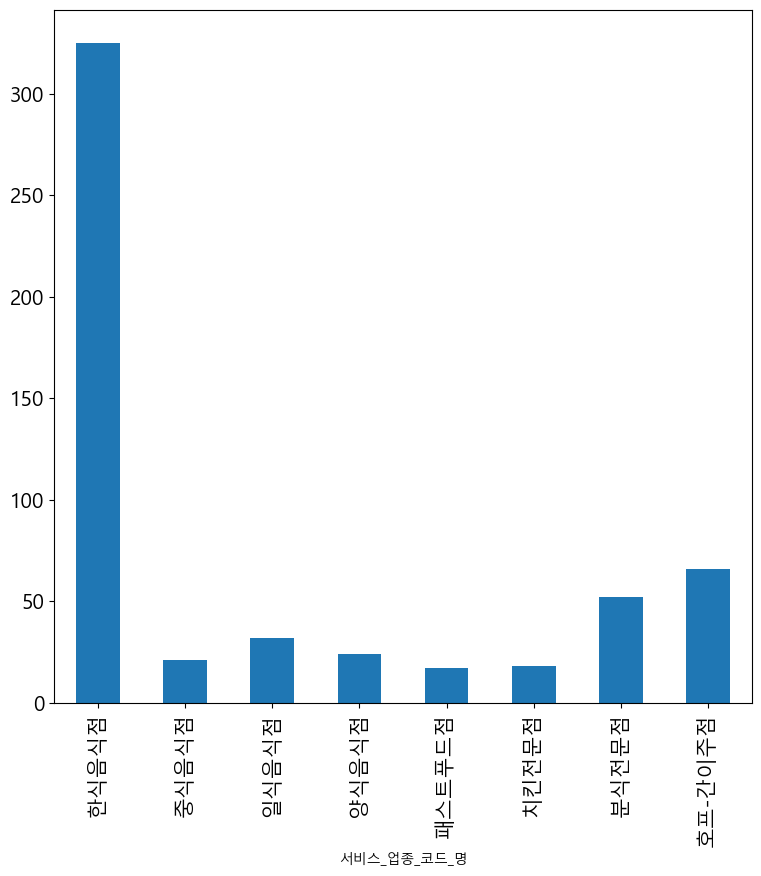

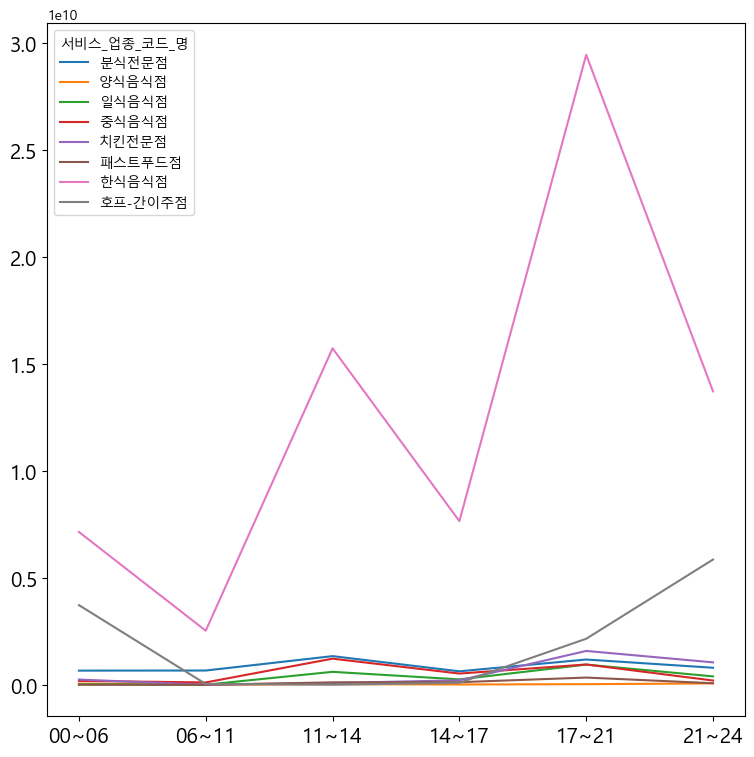

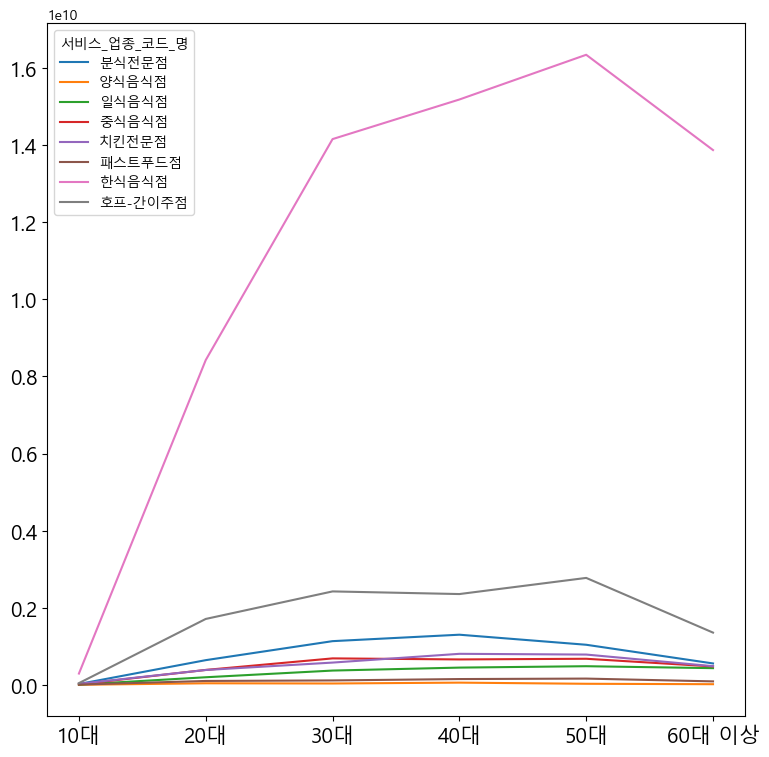

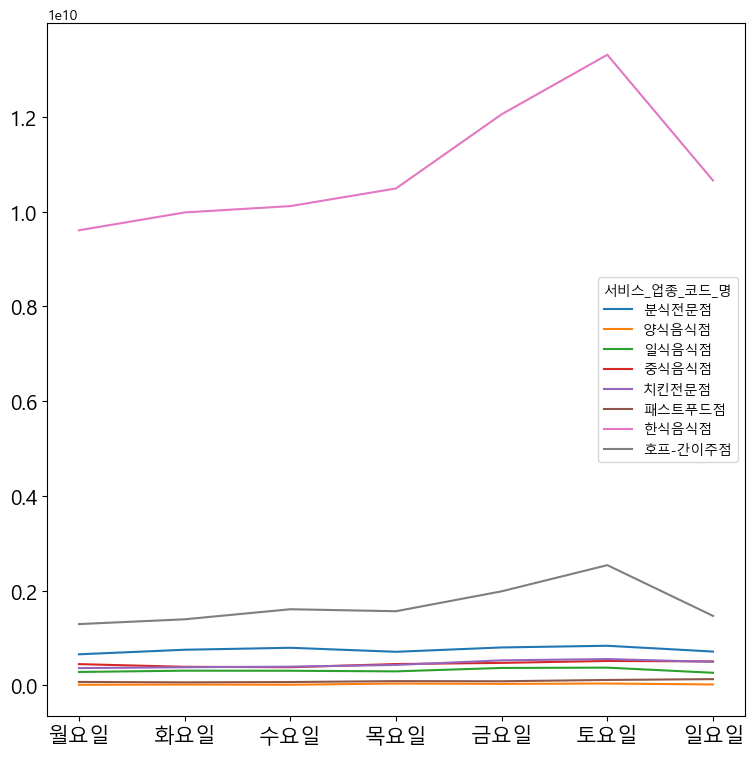

In [56]:
# 길동의 시간별, 요일별, 연령별 매출, 업종 별 점포 수 추출
get_data('길동')